# Course 301: Advanced Analytics for Organisational Impact
 

### Scenario

You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 

- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1: Linear Regression Using Python

The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

## Plan

1. Import and explore the data
2. Clean the data, removing any redundant columns and renaming columns when appropriate
3. Save a copy of the cleaned data to access later
4. Use statsmodels to test if the data satisfies OLS assumptions
5. Normalise the data if necessessary
6. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
7. Include your insights and observations.

In [6]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

## 1. Explore the data

In [8]:
# Load the CSV file(s) as reviews.
df = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
df.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [9]:
# Any missing values?
df.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [10]:
# Explore the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [11]:
df.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [12]:
# Basic descriptive statistics.
print(df['language'].unique())
print(df['platform'].unique())

['EN']
['Web']


Language and platform variables are constant, so they add no information. Therefore, they are unnecessary columns.

## 2. Clean the data, removing any redundant columns and renaming columns when appropriate

In [15]:
# Drop unnecessary columns
df.drop(['language','platform'],axis=1, inplace=True)

# View column names.
df.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

In [16]:
# Rename the column headers.
df.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'},inplace=True)

# View column names.
df.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Create new csv file named 'cleaned_reviews.csv'

In [18]:
# Create a CSV file as output.
df.to_csv('cleaned_reviews.csv',index=False)

In [19]:
# Import new CSV file with Pandas.
df = pd.read_csv('cleaned_reviews.csv')

# View DataFrame.
df.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 4. Check if data satisfies OLS assumptions

### Assumptions:

1. Linear relationship
2. No multicollinearity
3. Homoscedasticity: The variance of residuals should be constant
4. Normality of residuals: Residuals should be normally distributed
5. Independence of errors: Errors should not be correlated

In [22]:
# 1. Linear relationship
import seaborn as sns
# Scatterplot for each independent variable

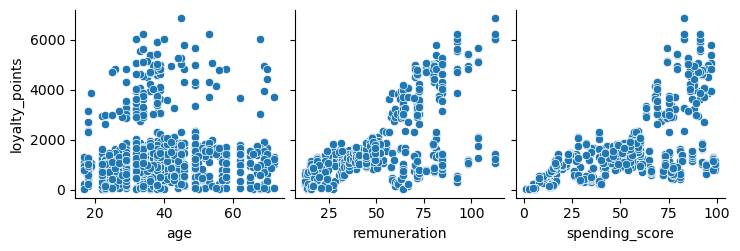

In [23]:
sns.pairplot(data=df, x_vars=['age','remuneration','spending_score'],y_vars='loyalty_points',kind='scatter')
plt.show()

There doesn't appear to be a clear linear relationship in any of the plots. 

In [25]:
# 2. Test for multicollinearity
X = df[['age','remuneration','spending_score']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

Variable       VIF
0             age  4.299621
1    remuneration  4.211139
2  spending_score  3.285346

All VIF < 10, so no significant multicollinearity. Assumption 2 is satisfied.

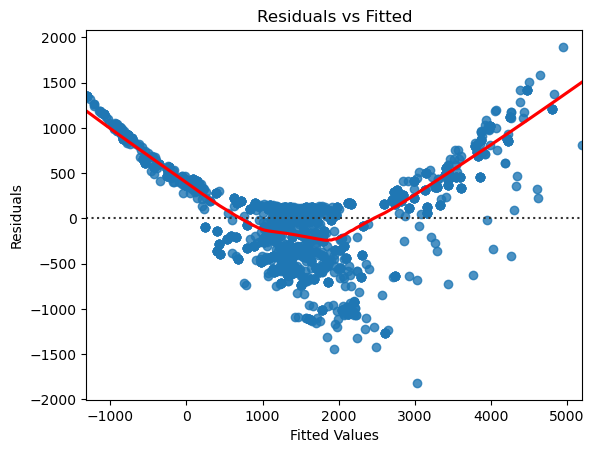

In [27]:
# 3. Check for homoscedasticity
# Fit the OLS model
X = sm.add_constant(X) # Add a constant term
y = df['loyalty_points']
model = sm.OLS(y,X).fit()
residuals = model.resid

# Residuals vs Fitted Plot
fitted_vals = model.fittedvalues
sns.residplot(x=fitted_vals,y=residuals,lowess=True,line_kws={'color':'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

As the red line is not flat and the residuals do not seem randomly scattered, homoscedasticity is not satisfied.

In [29]:
# 4. Normality of Residuals

In [30]:
# Use a Shapiro-Wilk test.
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)

Shapiro-Wilk Test Statistic: 0.9888861843163939
p-value: 2.694190060290375e-11


The null hypothesis is that the data was drawn from a normally distributed data set. As the p-value is extremely strong, the hypothesis is rejected in favour of the alternative that the residuals are not normally distributed.
Therefore, the normality of residuals assumption is not satisfied. 

In [32]:
# 5. Independence of Errors

In [33]:
# Use the Durbin-Watson test for autocorrelation in residuals
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print('Durbin-Watson Statistic:', dw_stat)

# A value near 2 suggests no autocorrelation

Durbin-Watson Statistic: 3.4534017787867333


The Durbin-Watson statistic always assumes a value between 0 and 4. A value of 3.45 suggests a strong negative serial correlation, meaning that the errors are not independent.

### Implication of OLS assumptions

Because all but one of the OLS assumptions (No multicollinearity) were satisfied, OLS linear regression is unlikely to produce reliable predictions. Measures could be taken to improve the shape of the data, but because the problems are so numerous, it would seem more productive to use models that are less impacted by such limitations rather than extensively reformat the data to suit OLS regression. Models such as Decision Trees and Random Forests are likely to perform better.

## 6. Linear Regression

In [37]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
# Define independent variable.
X = df[['age', 'remuneration', 'spending_score']]
# Define dependent variable.
y = df['loyalty_points']
mlr.fit(X, y) 

LinearRegression()

In [38]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8399114912748796
Intercept:  -2203.0597513078947
Coefficients:


[('age', 11.060658711843272),
 ('remuneration', 34.0083854926025),
 ('spending_score', 34.18319657763359)]

The R-squared of 0.84 (2 d.p.) suggests that the regression model explains roughly 84% of the variation in loyalty_points, which is good for three variables. All three variables have positive relationships with loyalty points. Remuneration and spending score both have coefficients of 34, implying that a unit increase in either will lead to a 34 unit increase in loyalty points. Age's coefficient of 11 suggests that an 11 unit increase in loyalty points would follow a single unit increase in age. 

### Predict with regression

In [41]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
mlr = LinearRegression()
# Fit the model with the training data.
mlr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2513.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:43:24   Log-Likelihood:                -10711.
No. Observations:                1400   AIC:                         2.143e+04
Df Residuals:                    1396   BIC:                         2.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2185.5298     61.684    -35.

In [44]:
# Print the R-squared value.
print(mlr.score(X_test, y_test)*100)  

83.00534613807653


mlr achieves very similar results to the test data results using the training data. 

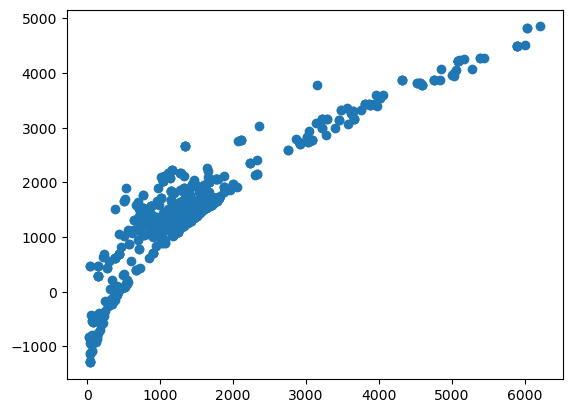

In [45]:
plt.scatter(y_test,Y_pred)
plt.show()

Consistent with the regression using the complete data, the training set data does a good job of representing the complete dataset. It is worthwhile to note that the distribution of y-results resembles that of a logarithm. Modeling the dependent variable as a logarithm, measuring the rate of change given independent variables, might yield more reliable and useful results. 

# Week 2 assignment: Exploring the structure using decision trees.

Use decision trees to attempt to better understand the structure found in the data. Grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)

## 1. Load and prepare the data

In [49]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import math

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [50]:
df = pd.read_csv('cleaned_reviews.csv')
# Establish dependent and independent variables
y = df['loyalty_points']
X = df[['age','remuneration','spending_score']]

### Create train and test data sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

### Create decision tree regressor and fit and plot final model

In [54]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
# Predict using the test data
y_pred = regressor.predict(X_test)

# Evaluate Performance
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
# Calculate the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
# Calculate R-squared
print("R-squared: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  26.175
Mean Squared Error:  6390.525
Root Mean Squared Error:  79.94075931588341
R-squared:  0.9960547369776616


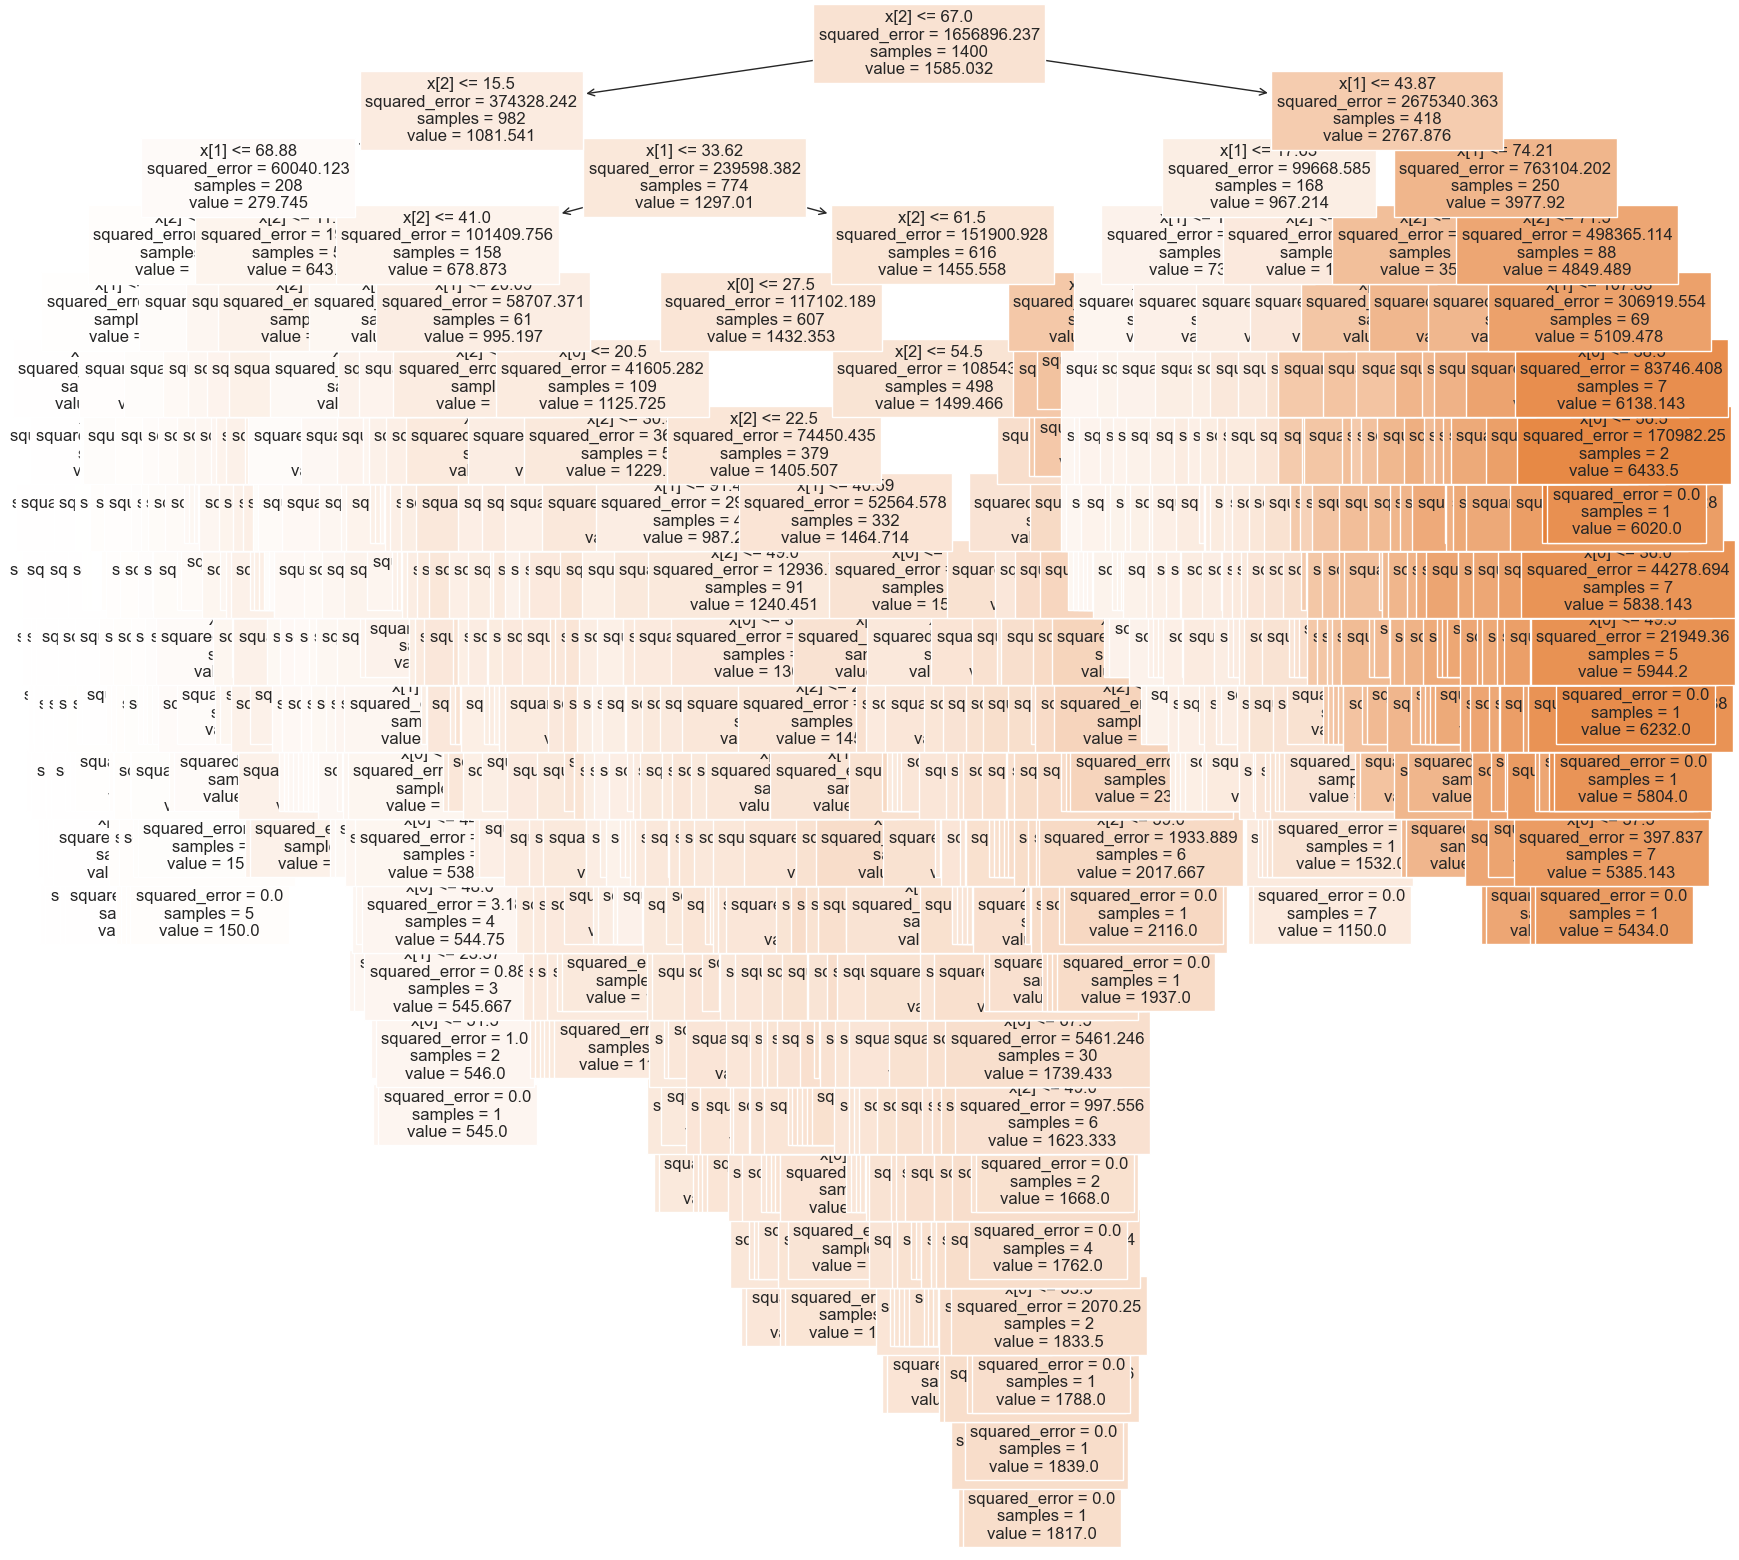

In [302]:
# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regressor, fontsize=12, filled=True)

# save image
plt.savefig('decision_tree.png', format='png')
# Print the plot with plt.show().
plt.show()

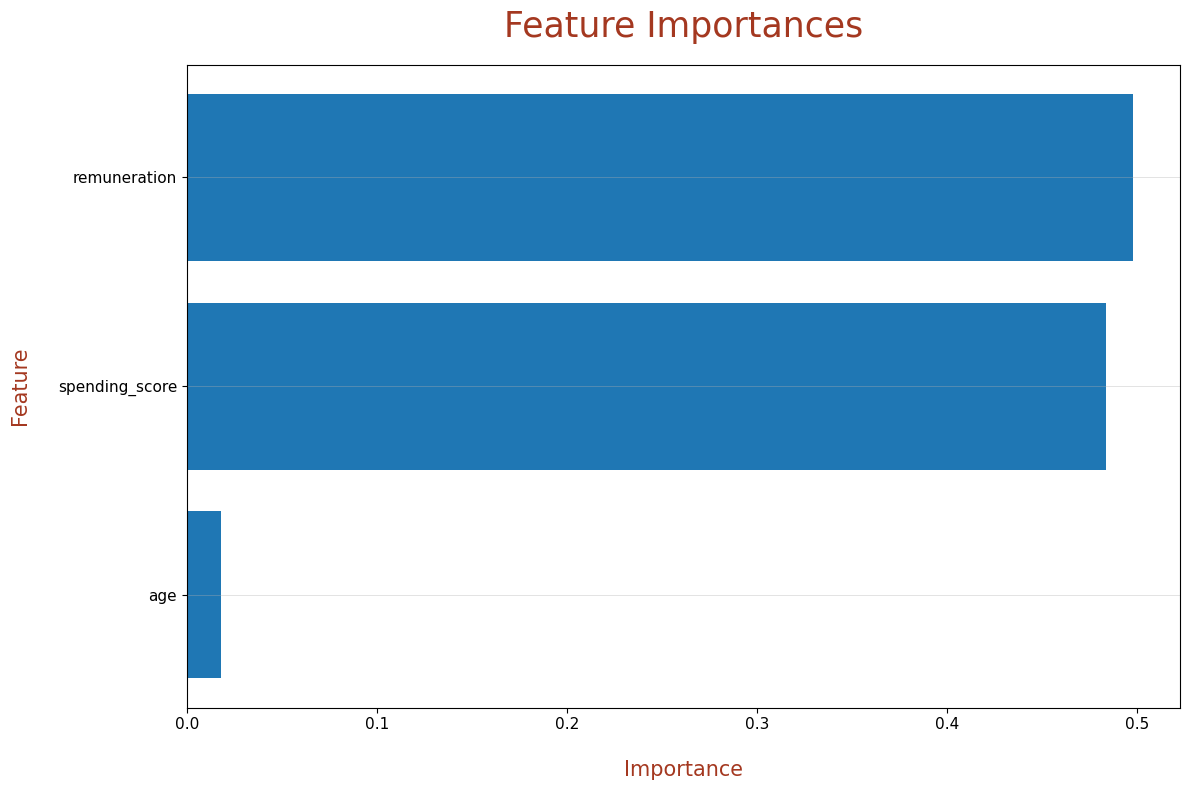

In [57]:
# Extract feature importances.
feature_importances = regressor.feature_importances_

# Create the list of columns.
feature_cols = [c for c in X.columns]

# Create a DataFrame to display feature importances.
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances.
plt.figure(figsize = (12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances', color = '#a43820', size = 25, pad = 20)
plt.xlabel('Importance', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.ylabel('Feature', color = '#a43820', size = 15, ha = 'center', labelpad = 20)
plt.grid(False, axis = 'x')
plt.grid(True, axis='y', alpha = 0.5, linewidth = 0.5)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.tight_layout()
plt.show()

Consistent with the multiple linear regression results, age is a much less important predictor of loyalty_points than spending_score and remuneration. 

## Simple pruning by limiting depth

Simplify the tree by reviewing the results of pruning based on a maximum depth of between 1 and 7.

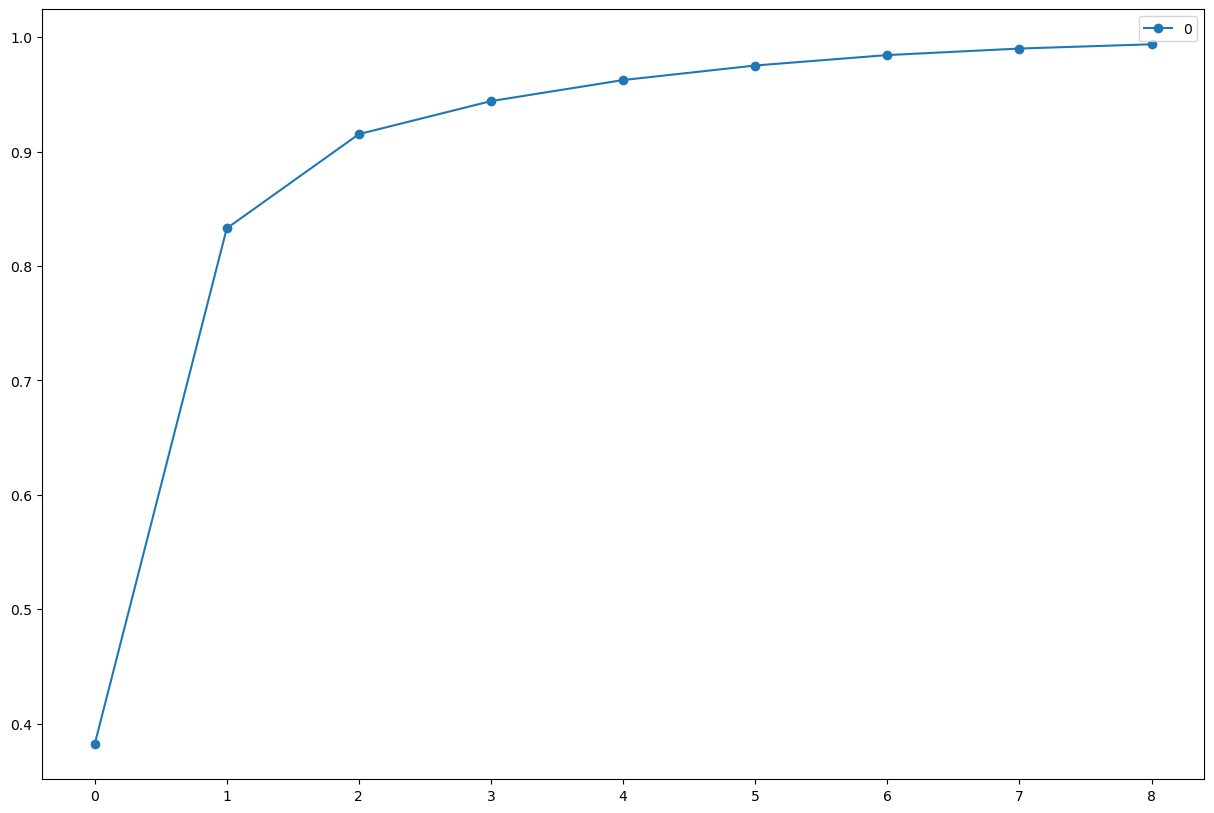

In [60]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    dtrg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dtrg.fit(X, y)
    score = dtrg.score(X_test, y_test)
    accuracy.append(score)

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot(marker='o')
plt.show()

Although there is reason to increase max depth, setting it at a value of 5 seems sufficient because the improvement in model performance marginally diminishes.

In [306]:
pruned_tree = DecisionTreeRegressor(criterion='squared_error',
                                    max_depth=5,
                                    random_state=42)

# Train the decision tree classifier.
pruned_tree = pruned_tree.fit(X_train, y_train) 

# Predict the response for the test data set.
y_pred = pruned_tree.predict(X_test) 

In [308]:
# Evaluate Performance of final model
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
# Calculate the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
# Calculate R-squared
print("R-squared: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  176.80646418311764
Mean Squared Error:  70121.16425180058
Root Mean Squared Error:  264.8040110190942
R-squared:  0.9567099046782617


Pruning with a max_depth value of 5 was a success. The model is simplified and therefore more readable, without losing its explaining power; the error metrics are larger due to the pruning, but the R-squared remains very high.

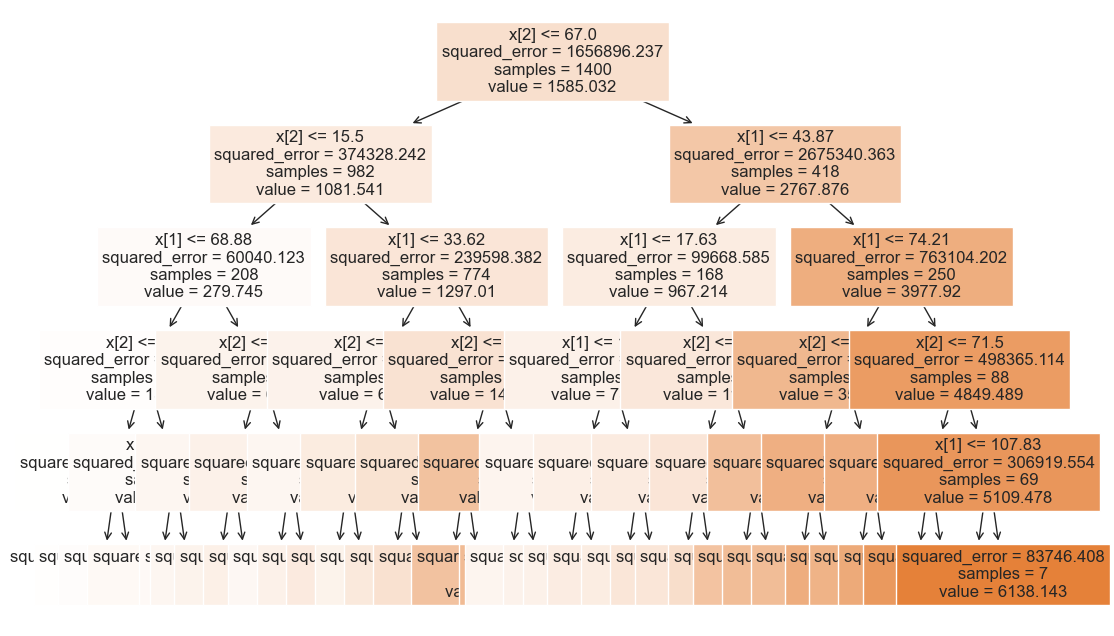

In [313]:
# Plot the pruned decision tree to create the visualisation.
plot_tree(pruned_tree, fontsize=12, filled=True)
# save figure
plt.savefig('pruned_tree.png', format='png')
# Print the plot with plt.show().
plt.show()

### Applying post-pruning with Cost Complexity

In [67]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Array of effective cost-complexity pruning parameters
impurities = path.impurities  # Total impurity of leaves at each alpha

# Train a tree for each alpha value
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    model.fit(X_train, y_train)
    models.append(model)

# Evaluate each model on the validation set
from sklearn.model_selection import cross_val_score

cv_scores = [np.mean(cross_val_score(model, X_train, y_train, cv=5)) for model in models]

# Choose the best alpha
best_index = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_index]

# Final model with best alpha
pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=42)
pruned_tree.fit(X_train, y_train)

# Evaluate Performance of final model
y_pred = pruned_tree.predict(X_test)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
# Calculate the RMSE.
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
# Calculate R-squared
print("R-squared: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  26.178055555555552
Mean Squared Error:  6390.186342592592
Root Mean Squared Error:  79.93864111049544
R-squared:  0.9960549460516495


Mean Squared Error (MSE) is roughly the same pre -and post-pruning, so there is not much difference in performance.

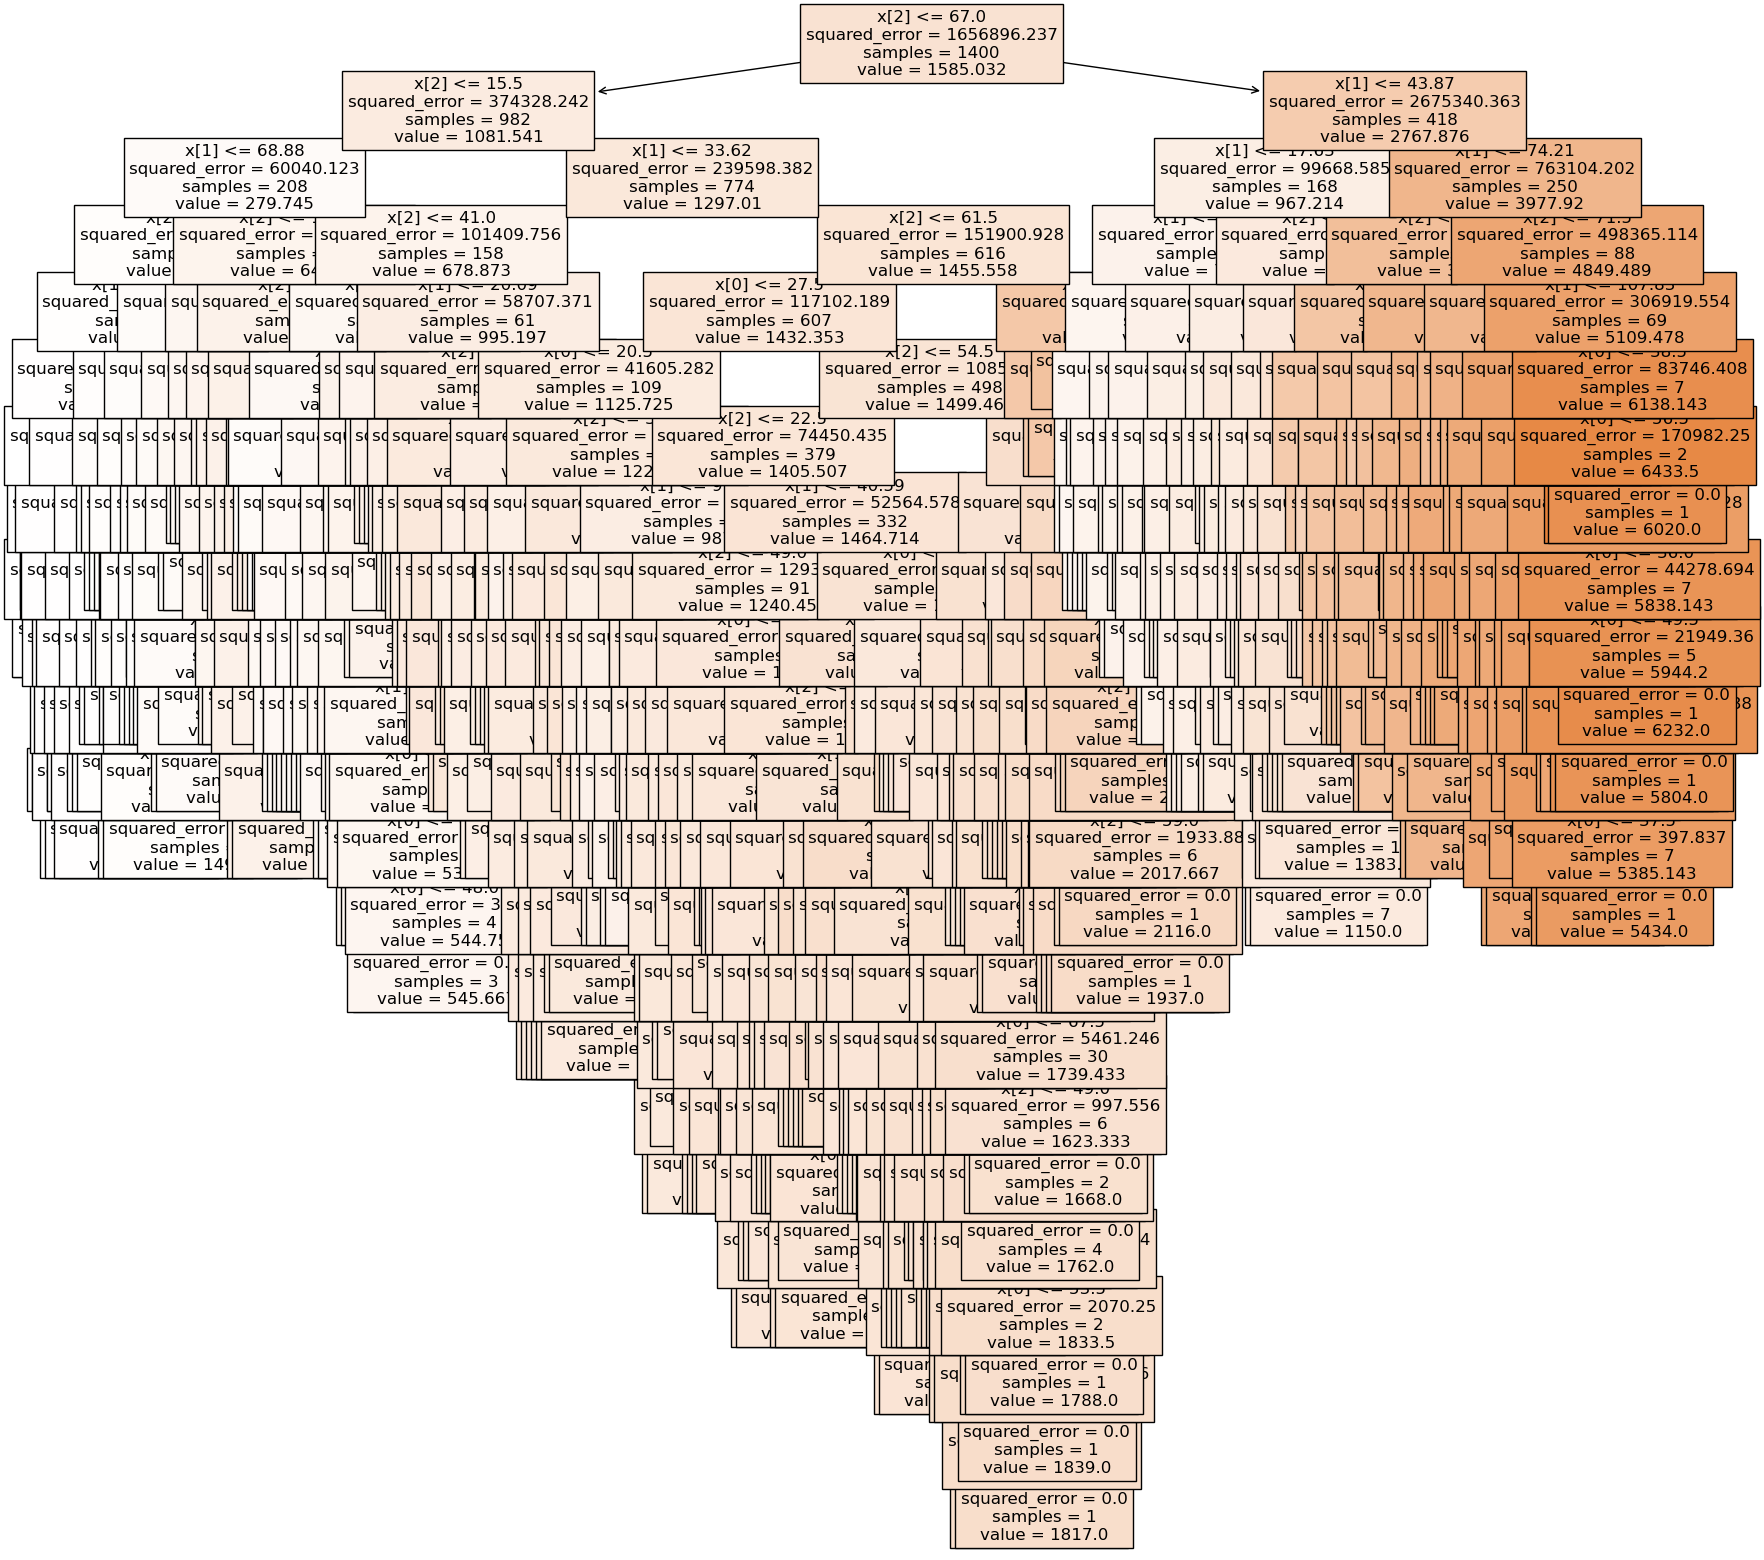

In [69]:
# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(pruned_tree, fontsize=12, filled=True)

# Print the plot with plt.show().
plt.show()

As we can see, pruning with cost complexity was less successful as the model is mostly unchanged; the pruning is not extensive enough for the model to be readable and the prediction power of the model is no better by any significant degree than 5-branch tree. In conclusion, the simple pruning method is preferred. 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

In [317]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

## 1. Load and explore the data

In [320]:
df = pd.read_csv('cleaned_reviews.csv')
df2 = df[['remuneration','spending_score']]
df2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [322]:
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

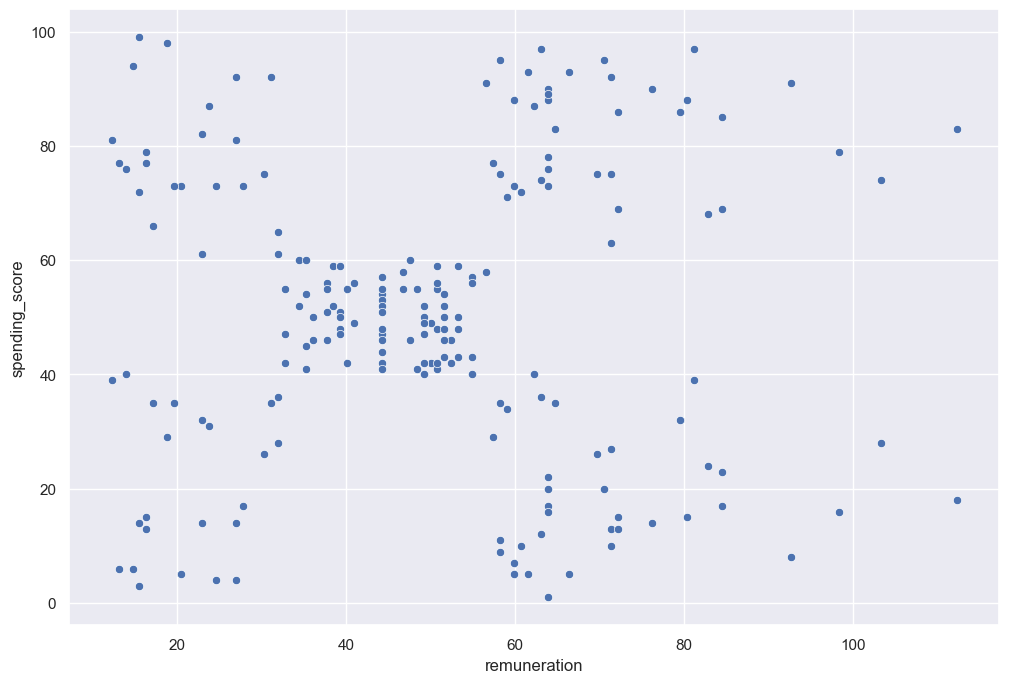

In [325]:
# Create a scatterplot with Seaborn
sns.scatterplot(data=df2,x='remuneration',y='spending_score',markers='o')
plt.show()

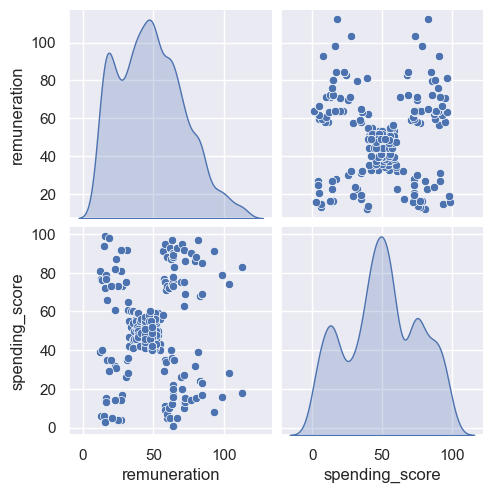

In [339]:
# Create a pairplot with Seaborn
sns.pairplot(df2,diag_kind='kde')
# Save fig
plt.savefig('pairplot.png',format='png')
# Show figure
plt.show()

From observation, there appear to be five clusters, which can be interpreted as five different customer types.

## 3. Use the Silhouette and Elbow methods for cluster number selection

### The Elbow Method

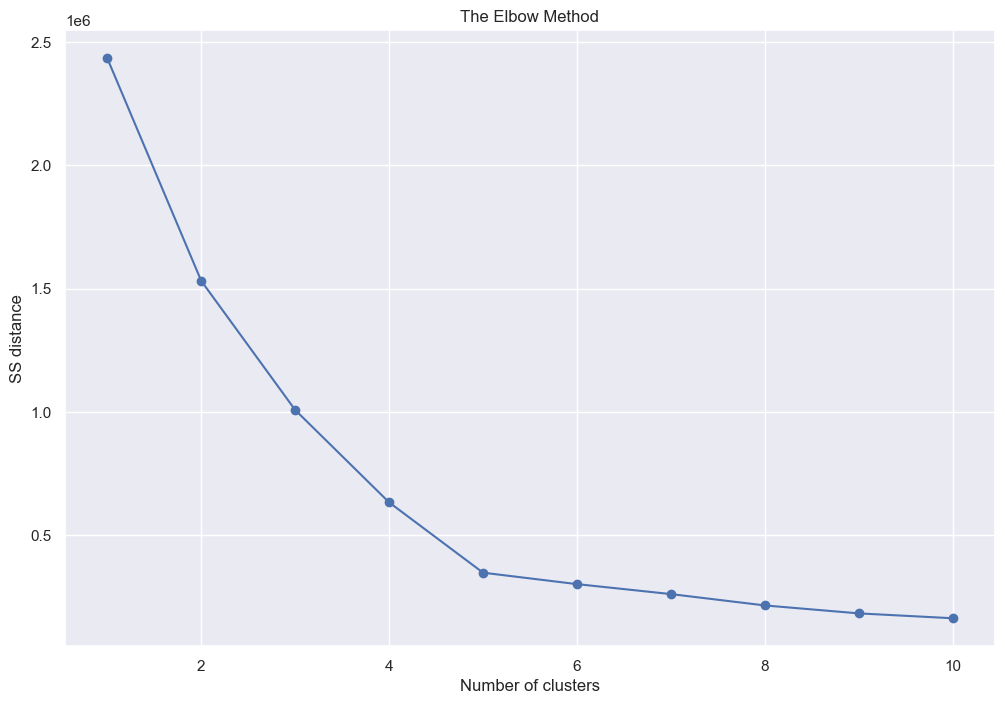

In [378]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = [] # Sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")
plt.savefig('Elbow Method.png',format='png')
plt.show()

The kink appears to be at cluster number 5. According to the Elbow Method, the ideal number of clusters is 5, consistent with expectations.

### The Silhouette Method

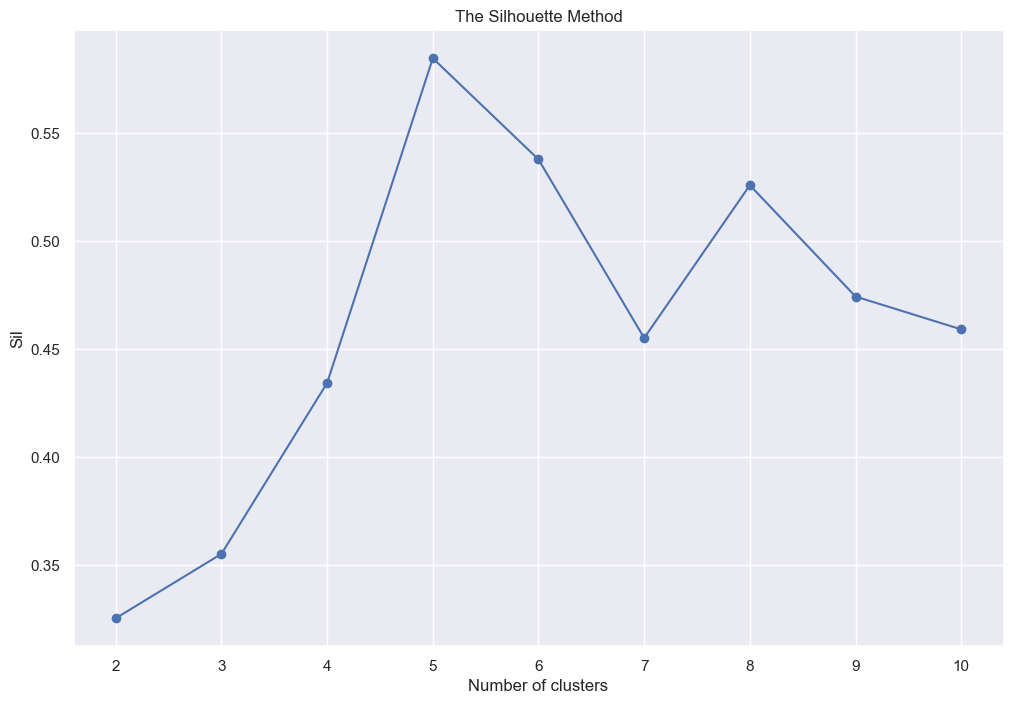

In [380]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')
# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.savefig('Silhouette Method.png',format='png')

plt.show()

This method determins the k that averages intra-cluster distance. The higher the Sil value, the better. Given that the highest point is at 5 clusters, The Silhouette Method indicates that the optimal number of clusters is 5. This is consistent with the Elbow Method and with visual observation. 

Therefore, optimal k = **5** 

## 4. Evaluate K-means model at different values of k

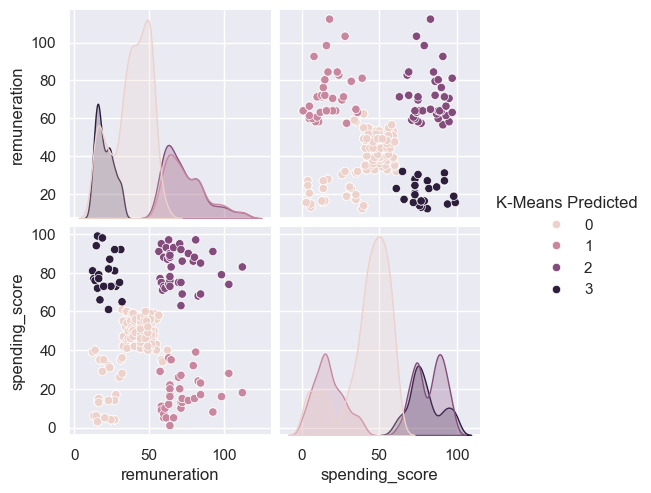

In [351]:
# k = 4
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [353]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

K-Means Predicted
0    1045
2     356
1     330
3     269
Name: count, dtype: int64

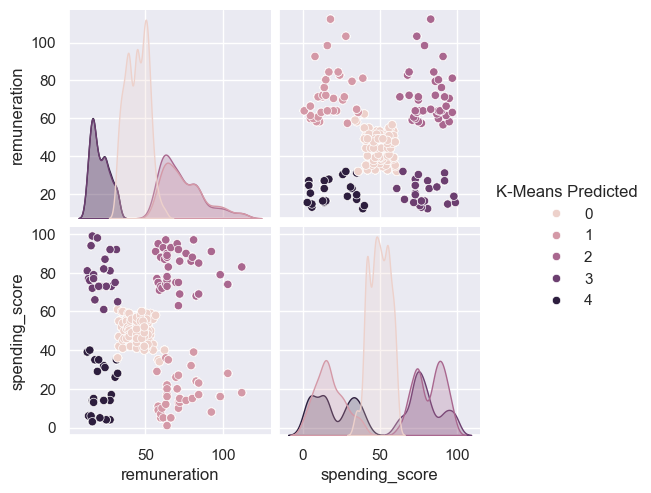

In [355]:
# k = 5
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [357]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

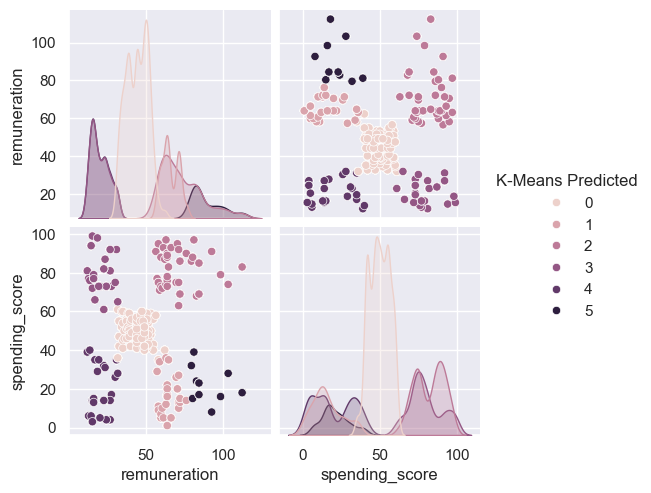

In [359]:
# k = 6
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [361]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

K-Means Predicted
0    767
2    356
4    271
3    269
1    214
5    123
Name: count, dtype: int64

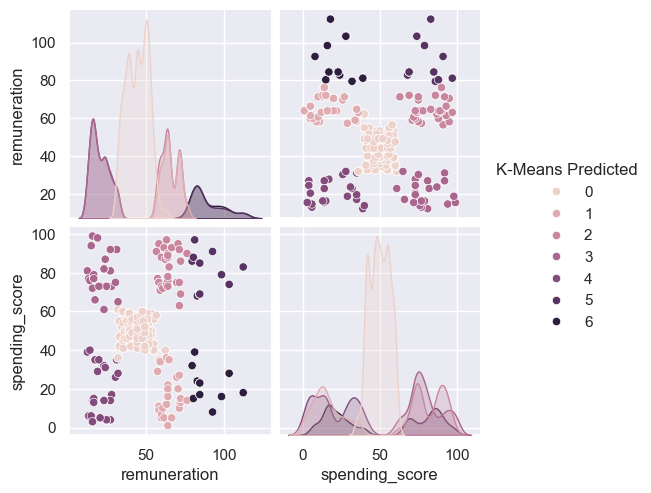

In [363]:
# k = 7
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [365]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

K-Means Predicted
0    767
4    271
3    269
2    238
1    214
6    123
5    118
Name: count, dtype: int64

Cluster **0** always has the greatest concentration of markers, but from k=5 onwards, the count of values roughly is the same. The number of predicted values per class indicates a better distribution for k=5. 

## 5. Fit final model 

In [369]:
# k = 5
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
4    356
2    330
3    271
1    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3

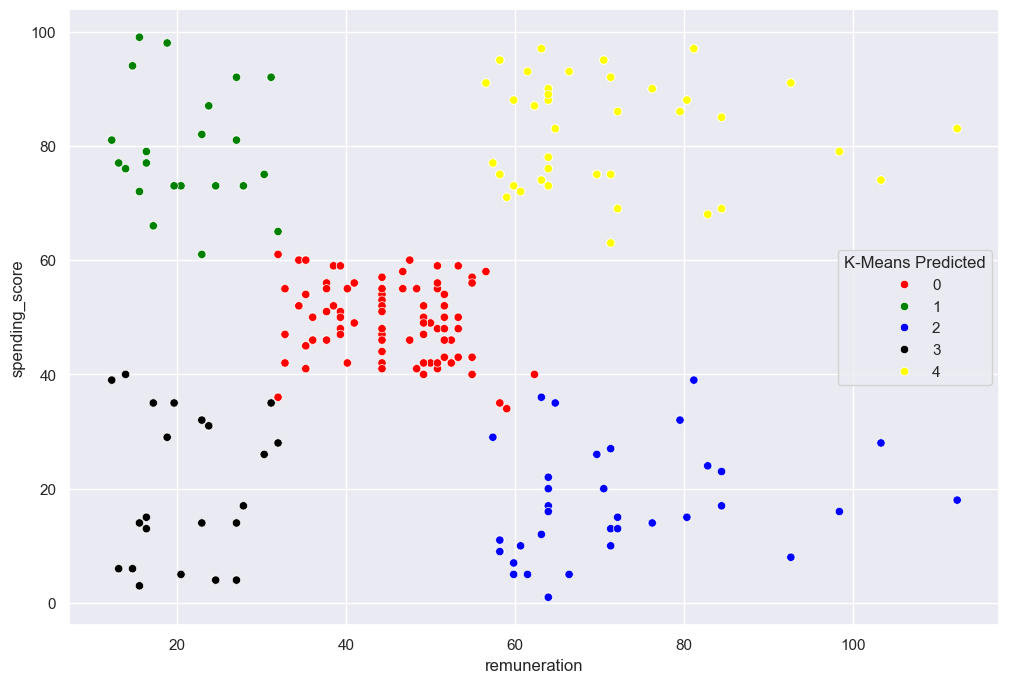

In [372]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration', 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','yellow'])

# Save image
plt.savefig('k_means_cluster.png',format='png')

# View the DataFrame.
df2.head()

## Segmenting the customers

### Create customer_id and num_of_purchases columns

By grouping customers by cluster, it might be possible to discover greater insights into consumer tastes and behaviour. The challenge is distinguishing customers from each other. Customers are not assigned ID numbers, which would make this easy. Therefore, I will assume that no customer has the same gender, age, renumeration, spending_score, loyalty_points, and education as another customer. The probability of this is small, but not zero, so removing duplicates based on these columns may remove some rows by mistake, but the overall results will be accurate. 

In summary, I assume that each combination of age + remuneration + gender + spending_score + education is unique and it corresponds to a different customer. 


In [103]:
# Subset the data to get a different row for each customer.
customers = df.groupby(['age', 'remuneration', 'spending_score', 'gender', 'education'])['product'].count().reset_index()
print(f"The customers subset has {customers.shape[0]} rows, which suggests that the dataset contains data on {customers.shape[0]} customers.")

The customers subset has 782 rows, which suggests that the dataset contains data on 782 customers.


In [104]:
# Rename product as num_of_purchases.
customers = customers.rename(columns={'product': 'num_of_purchases'})
# View customers
customers.head()

age  remuneration  spending_score  gender     education  num_of_purchases
0   17         13.94              40  Female  postgraduate                 1
1   17         18.86              98    Male           PhD                 1
2   17         27.06               4    Male           PhD                 1
3   17         27.06              92    Male           PhD                 7
4   17         35.26              54  Female  postgraduate                 1

In [105]:
# Create a customer_id variable for each customer
customers["ID"] = range(1, len(customers) + 1)                  
customers.describe()

age  remuneration  spending_score  num_of_purchases          ID
count  782.000000    782.000000      782.000000        782.000000  782.000000
mean    39.554987     46.058414       49.604859          2.557545  391.500000
std     13.666746     25.249759       26.593610          2.631171  225.888247
min     17.000000     12.300000        1.000000          1.000000    1.000000
25%     29.000000     23.165000       29.000000          1.000000  196.250000
50%     38.000000     44.280000       50.000000          1.000000  391.500000
75%     49.000000     63.960000       73.000000          7.000000  586.750000
max     72.000000    112.340000       99.000000          9.000000  782.000000

In [106]:
# Join the two DataFrames to have client_id in the reviews DataFrame.
df_id = pd.merge(df, customers, on = ['age', 'remuneration', 'spending_score', 'gender', 'education'], how = 'left')

# Drop number_of_sales from this dataset.
df_id = df_id.drop(columns=['num_of_purchases'])

# Example: Show all purchases by customer with ID = 13
df_id[df_id['ID'] == 13]

gender  age  remuneration  spending_score  loyalty_points education  \
0      Male   18          12.3              39             210  graduate   
200    Male   18          12.3              39             210  graduate   
400    Male   18          12.3              39             210  graduate   
600    Male   18          12.3              39             210  graduate   
800    Male   18          12.3              39             210  graduate   
1000   Male   18          12.3              39             210  graduate   
1200   Male   18          12.3              39             210  graduate   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
200       466  I ordered this for my granddaughter for Christ...   
400       466  It's really helping my ADD'R learn to discuss ...   
600       291  I love this!!! My kids truly enjoy the experie...   
800      1031  Sid Sackson's classic has been on my shelf sin...   
1000     1501  Fun for the first few games but left a lot to ...   
1200     1183  Lots of interesting tiles in many sizes. Even ...   

                                                summary  ID  
0     The fact that 50% of this space is wasted on a...  13  
200                                     Pom Pom Puppies  13  
400                                          Five Stars  13  
600                                        I love this!  13  
800   Probably the single best 'great' but 'beginner...  13  
1000                       It's fun but no replay value  13  
1200                Does exactly what it's supposed to.  13

In [107]:
df_id.shape[0]

2000

Now, we have a customer ID connected to every purchase. There are also still 2000 rows, meaning that there were no duplicates; each combination of the variables mentioned was unique to each customer. 

## 7. Summary

- The most concentrated cluster is the middle cluster (0), where customers' remuneration mostly lie between 36 and 56, and spending scores mostly lie between 36 and 60.
- Clusters 1 and 2, where remuneration is roughly above 56, have more points than clusters 3 and 4, where remuneration is roughly below 36.

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [113]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt')
# nltk.download ('stopwords')
# !pip install WordCloud

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv('cleaned_reviews.csv')
df.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [115]:
# Create a new dataframe (df3) containing the 'review', 'summary', and 'product' columns.
df3 = df[['review','summary','product']]
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  product  
0  The fact that 50% of this space is wasted on a...      453  
1  Another worthless Dungeon Master's screen from...      466  
2                    pretty, but also pretty useless      254  
3                                         Five Stars      263  
4                                         Money trap      291

In [116]:
# Check for null values
df3.isna().sum()

review     0
summary    0
product    0
dtype: int64

No null values.

## 2. Prepare the data for NLP

### 2.1. Change the data to lower case and join the elements in each column

In [120]:
# review column
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# summary column
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2.2. Replace punction in each of the columns respectively

In [122]:
# Review column
df3['review'] = df3['review'].str.replace('[!\.\,\/\?\(\)\:\^\;\"\'\-]','', regex=True)
# Summary column
df3['summary'] = df3['summary'].str.replace('[!\.\,\/\?\(\)\:\^\;\"\'\-]','', regex=True)

In [123]:
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9* your unpainted m...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  product  
0  the fact that 50% of this space is wasted on a...      453  
1  another worthless dungeon masters screen from ...      466  
2                     pretty but also pretty useless      254  
3                                         five stars      263  
4                                         money trap      291

### 2.3. Drop duplicates in both columns

In [125]:
# Check the number of duplicate values in the review column.
df3['review'].duplicated().sum()

49

In [126]:
# Drop duplicates.
reviews = df3.drop_duplicates(subset=['review'])

In [127]:
# Check the number of duplicate values in the summary column.
df3['summary'].duplicated().sum()

647

In [128]:
# Drop duplicates
summaries = df3.drop_duplicates(subset=['summary'])

In [129]:
# Double check that there are no duplicates
print(reviews.duplicated().sum())
print(summaries.duplicated().sum())

0
0


## 3. Visualise the most frequently used words and create wordclouds

### reviews 

In [132]:
# String all the reviews together into a single variable
all_reviews = ''
for i in range(len(reviews)):
    # Add each review
    all_reviews += reviews['review'].iloc[i]

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the colour palette
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

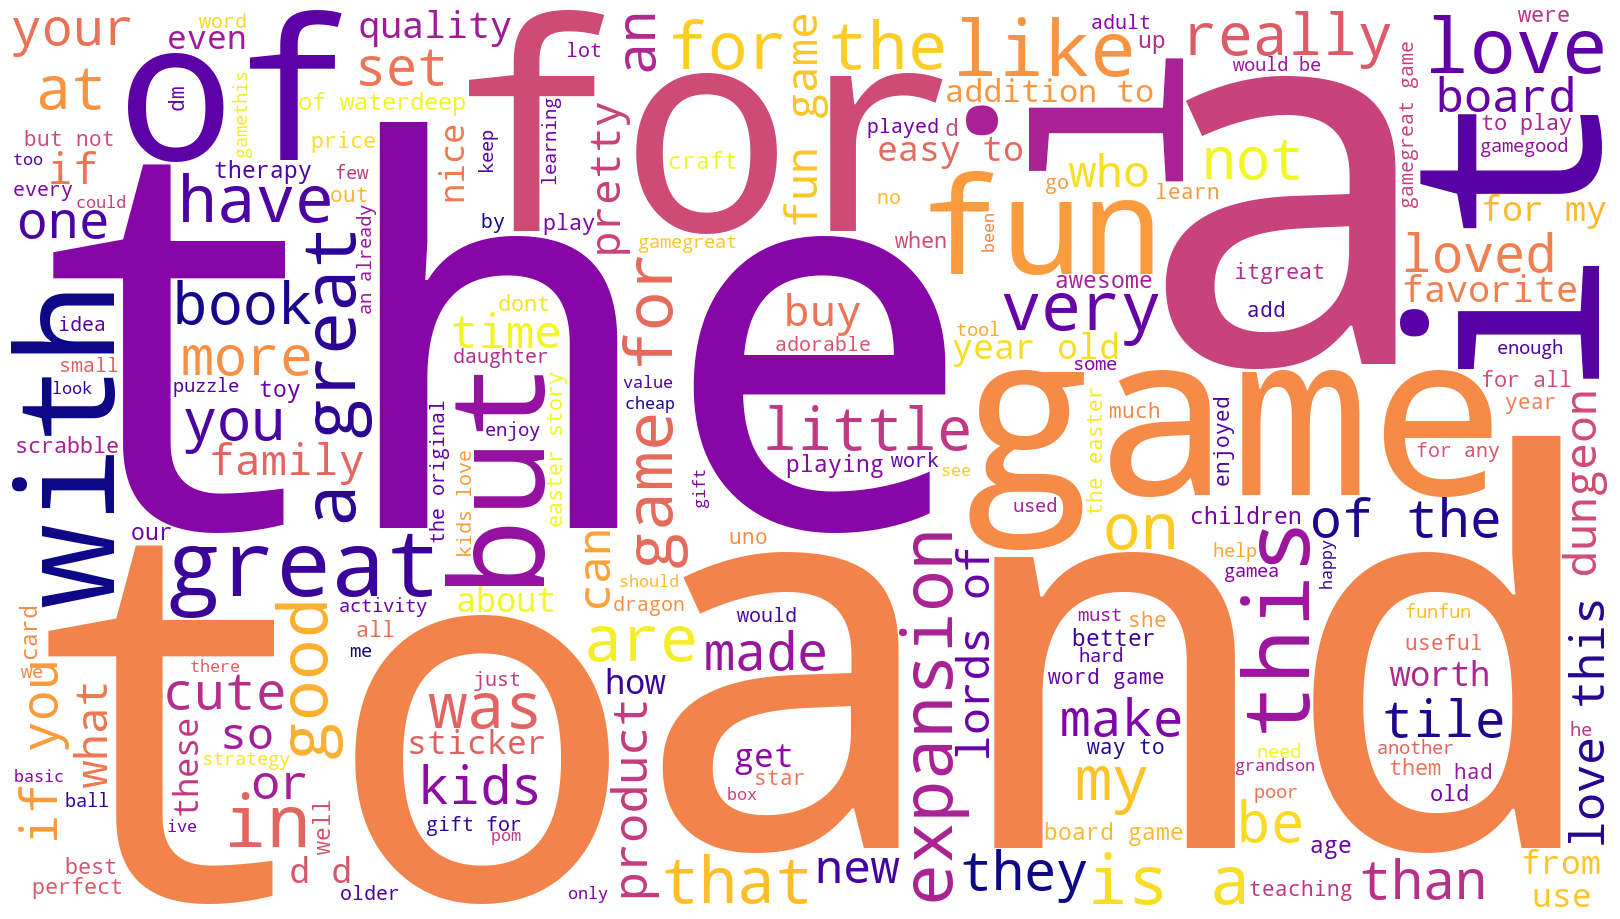

In [374]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.savefig('review_word_cloud_1.png',format='png')
plt.show()

### summaries

In [136]:
# String all the summaries together into a single variable
all_summaries = ''
for i in range(len(summaries)):
    # Add each summary
    all_summaries += summaries['summary'].iloc[i]

In [137]:
# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summaries)

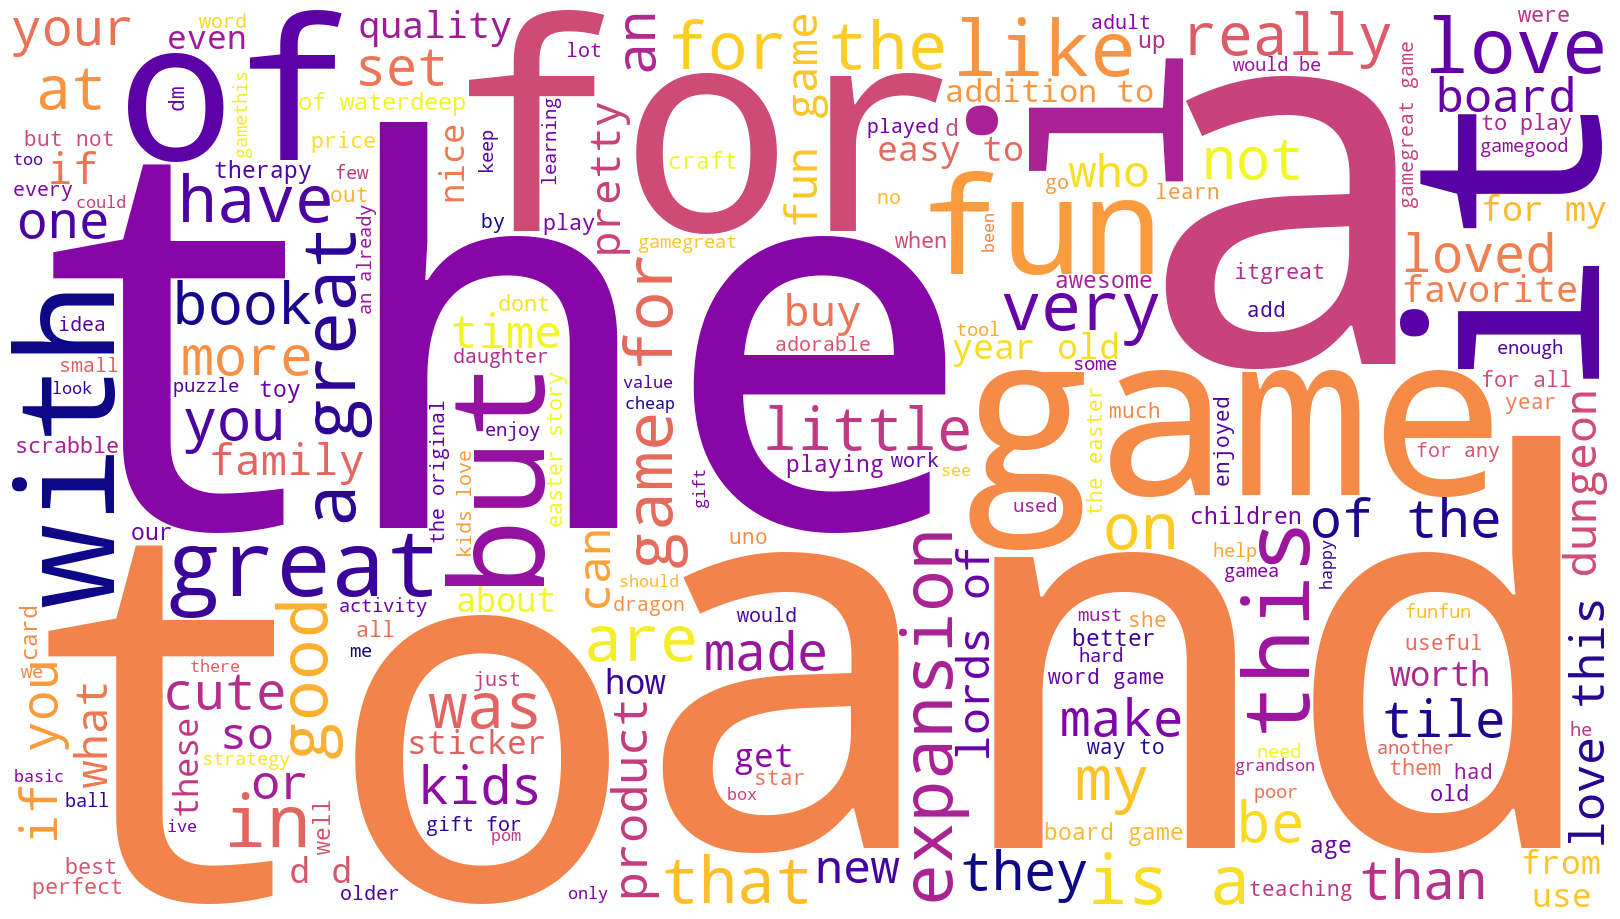

In [138]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### Tokenise the words

In [140]:
reviews['tokens'] = reviews['review'].apply(word_tokenize)
summaries['tokens'] = summaries['review'].apply(word_tokenize)

In [141]:
# For each column, define an empty list of tokens.
all_tokens_review = []

for i in range(reviews.shape[0]):
    # Add each token to the list.
    all_tokens_review += reviews['tokens'].iloc[i]

all_tokens_summary = []

for i in range(summaries.shape[0]):
    # Add each token to the list.
    all_tokens_summary += summaries['tokens'].iloc[i]

In [142]:
# Reviews
# Generate a DataFrame from Counter.
counts_for_reviews = pd.DataFrame(Counter(all_tokens_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_for_reviews

Frequency
Word           
the        5450
and        3233
a          3172
to         3162
of         2487
i          2089
it         2082
is         1781
this       1774
game       1670
for        1544
with       1264
you        1177
in         1147
that       1067

In [143]:
# Summaries
# Generate a DataFrame from Counter.
counts_for_summaries = pd.DataFrame(Counter(all_tokens_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_for_summaries

Frequency
Word           
the        5024
and        2937
a          2846
to         2843
of         2262
i          1888
it         1834
is         1595
this       1551
for        1363
game       1362
with       1125
you        1087
in         1066
that        992

## 4. Frequency distribution and polarity

### 4.1. Create frequency distribution

In [146]:
# Calculate the frequency distribution for review.
fdist_review = FreqDist(all_tokens_review)

# Preview data.
fdist_review

FreqDist({'the': 5450, 'and': 3233, 'a': 3172, 'to': 3162, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1670, ...})

In [147]:
# Calculate the frequency distribution for review.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'the': 5024, 'and': 2937, 'a': 2846, 'to': 2843, 'of': 2262, 'i': 1888, 'it': 1834, 'is': 1595, 'this': 1551, 'for': 1363, ...})

### 4.2. Remove alphanumeric characters and stopwords

In [149]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of review tokens without stopwords.
tokens_rev = [x for x in all_tokens_review if x.lower() not in english_stopwords]

# Define an empty string variable for reviews.
tokens_rev_string = ''

for value in all_tokens_summary:
    # Add each filtered token word to the string.
    tokens_rev_string += value + ' '

# Create a filtered list of summary tokens without stopwords.
tokens_sum = [x for x in all_tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable for summaries.
tokens_sum_string = ''

for value in all_tokens_summary:
    # Add each filtered token word to the string.
    tokens_sum_string += value + ' '

### 4.3. Create wordclouds without stopwords

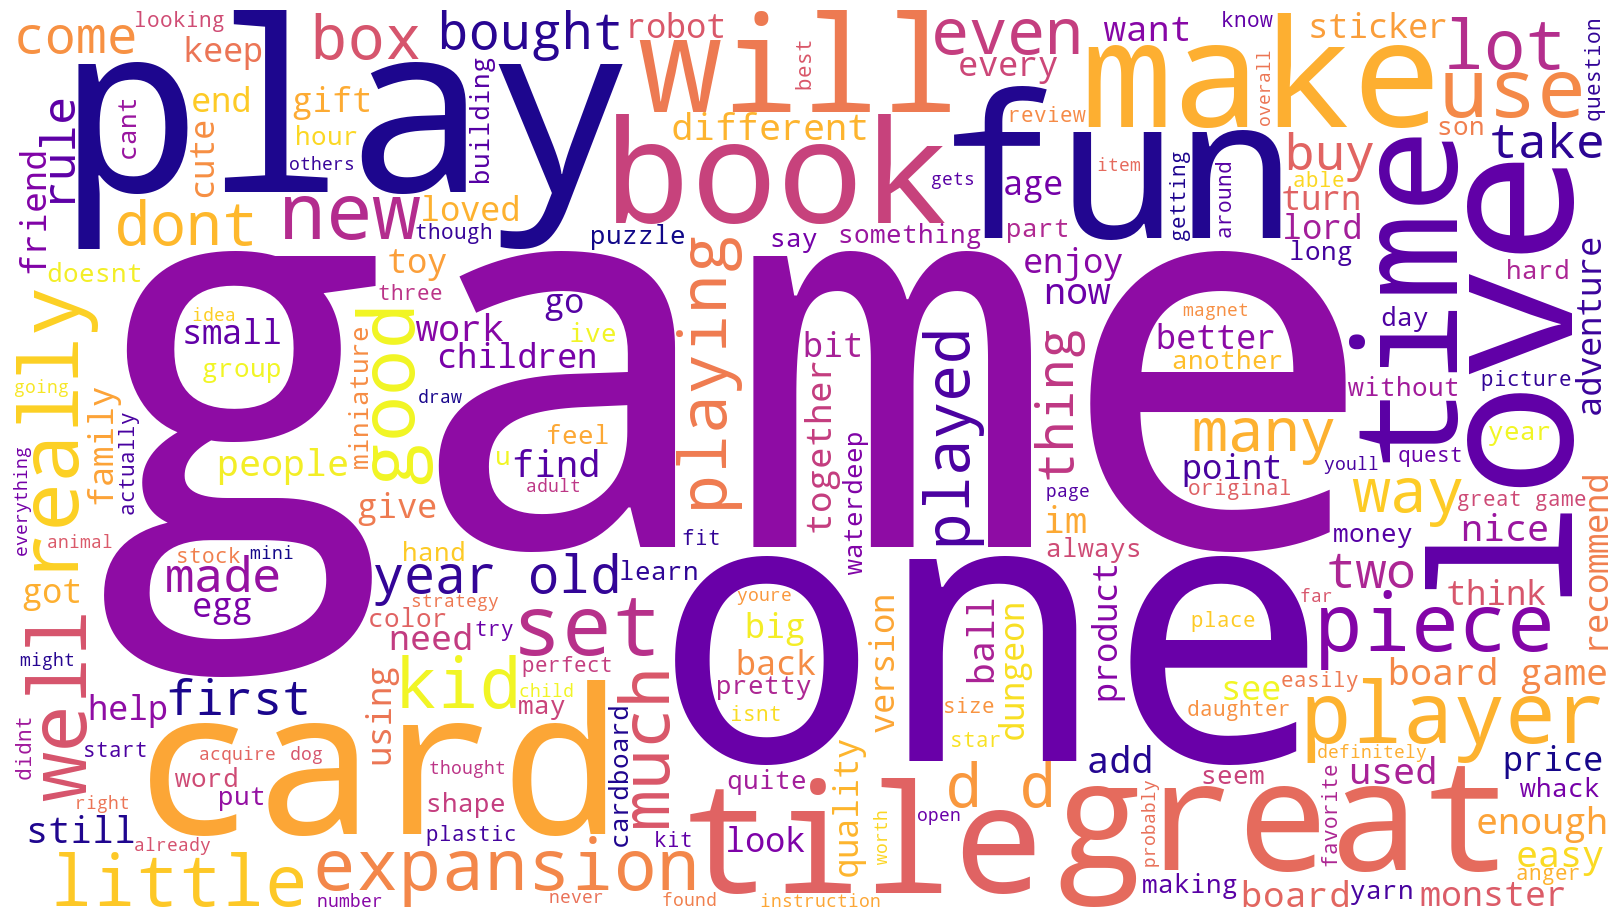

In [376]:
# Create a WordCloud for reviews.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_rev_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig('word_cloud_reviews.png',format='png')
plt.show()

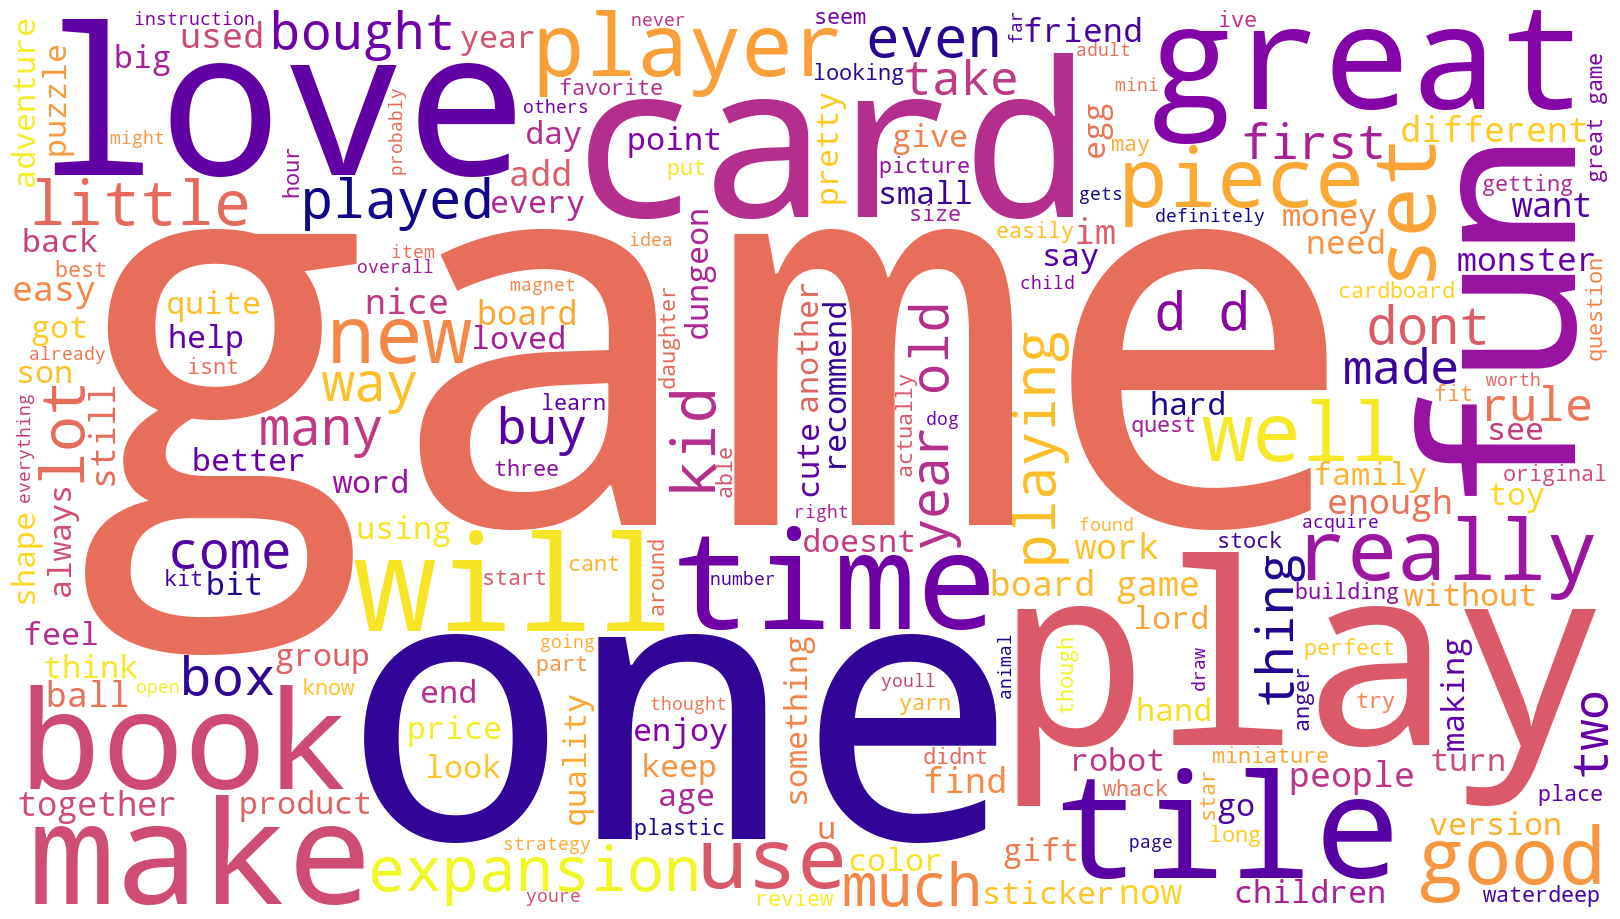

In [152]:
# Create a WordCloud for summaries.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_sum_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4.4. Identify 15 most common words and polarity

In [154]:
# View the frequency distribution for reviews.
fdist1_rev = FreqDist(tokens_rev)
fdist1_rev

FreqDist({'game': 1670, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [155]:
# Reviews
# Generate a DataFrame from Counter.
counts_for_reviews = pd.DataFrame(Counter(tokens_rev).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_for_reviews

Frequency
Word             
game         1670
great         579
fun           549
one           530
play          502
like          414
love          322
really        319
get           319
cards         301
tiles         297
time          291
good          287
would         280
book          273

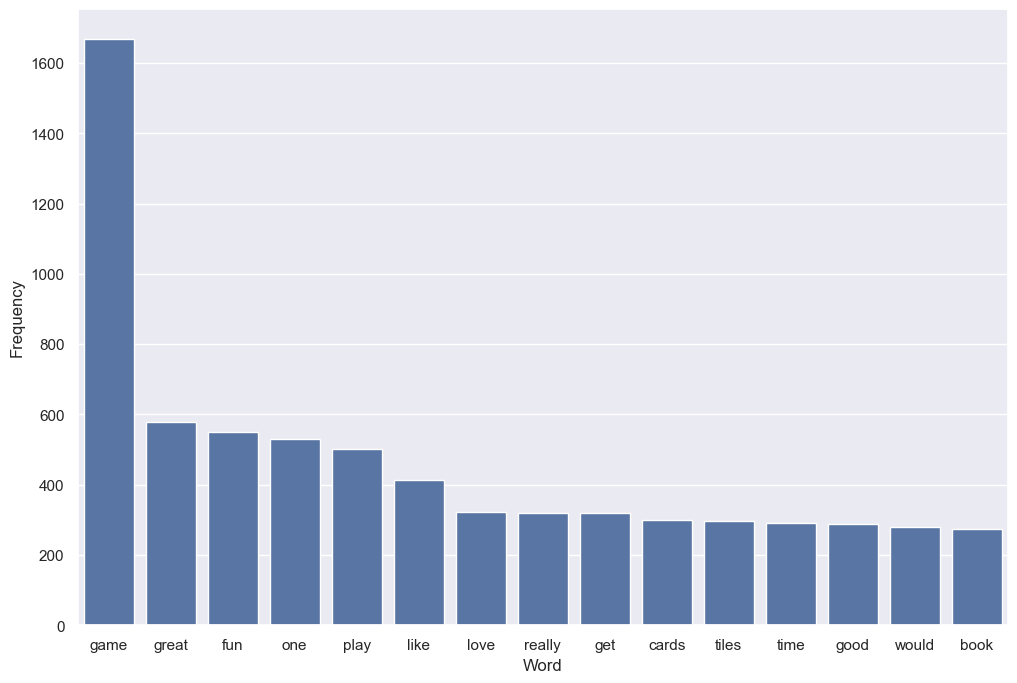

In [156]:
# Visualise
sns.barplot(data=counts_for_reviews, x='Word',y='Frequency')
plt.show()

In [157]:
# View the frequency distribution for summaries.
fdist1_sum = FreqDist(tokens_sum)
fdist1_sum

FreqDist({'game': 1362, 'one': 475, 'play': 442, 'fun': 407, 'great': 394, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [158]:
# Summaries
# Generate a DataFrame from Counter.
counts_for_summaries = pd.DataFrame(Counter(tokens_sum).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_for_summaries

Frequency
Word             
game         1362
one           475
play          442
fun           407
great         394
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

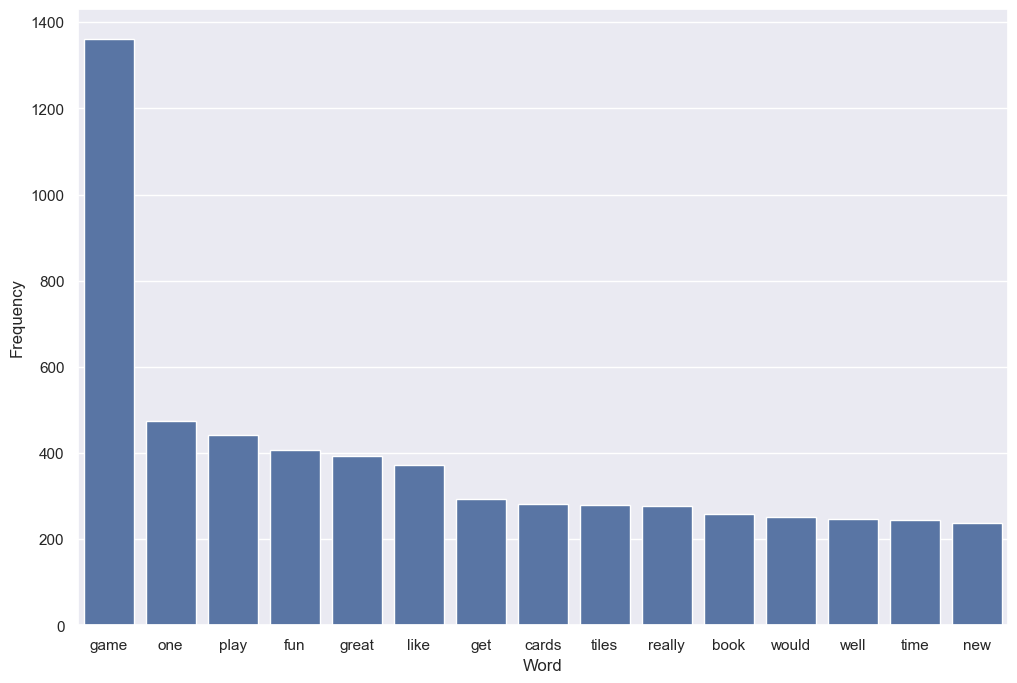

In [159]:
# Visualise
sns.barplot(data=counts_for_summaries, x='Word',y='Frequency')
plt.show()

### Calculate the sentiment polarity of the top 15 words

In [161]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [162]:
# Create polarity object.
sia = SentimentIntensityAnalyzer()
# Make a list of the top 15 words in review column.
top_rev_words = counts_for_reviews.index.to_list()
# Use a for loop to run sentiment polarity.
for word in top_rev_words:
    score = sia.polarity_scores(word)['compound']
    print(f'The sentiment value of the sentence :"{word}" is : {score}')
    print("="*50)

The sentiment value of the sentence :"game" is : 0.0
The sentiment value of the sentence :"great" is : 0.6249
The sentiment value of the sentence :"fun" is : 0.5106
The sentiment value of the sentence :"one" is : 0.0
The sentiment value of the sentence :"play" is : 0.34
The sentiment value of the sentence :"like" is : 0.3612
The sentiment value of the sentence :"love" is : 0.6369
The sentiment value of the sentence :"really" is : 0.0
The sentiment value of the sentence :"get" is : 0.0
The sentiment value of the sentence :"cards" is : 0.0
The sentiment value of the sentence :"tiles" is : 0.0
The sentiment value of the sentence :"time" is : 0.0
The sentiment value of the sentence :"good" is : 0.4404
The sentiment value of the sentence :"would" is : 0.0
The sentiment value of the sentence :"book" is : 0.0


In [163]:
# Make a list of the top 15 words in summary column.
top_sum_words = counts_for_summaries.index.to_list()
# Use a for loop to run sentiment polarity.
for word in top_sum_words:
    score = sia.polarity_scores(word)['compound']
    print(f'The sentiment value of the sentence :"{word}" is : {score}')
    print("="*50)

The sentiment value of the sentence :"game" is : 0.0
The sentiment value of the sentence :"one" is : 0.0
The sentiment value of the sentence :"play" is : 0.34
The sentiment value of the sentence :"fun" is : 0.5106
The sentiment value of the sentence :"great" is : 0.6249
The sentiment value of the sentence :"like" is : 0.3612
The sentiment value of the sentence :"get" is : 0.0
The sentiment value of the sentence :"cards" is : 0.0
The sentiment value of the sentence :"tiles" is : 0.0
The sentiment value of the sentence :"really" is : 0.0
The sentiment value of the sentence :"book" is : 0.0
The sentiment value of the sentence :"would" is : 0.0
The sentiment value of the sentence :"well" is : 0.2732
The sentiment value of the sentence :"time" is : 0.0
The sentiment value of the sentence :"new" is : 0.0


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [165]:
from textblob import TextBlob
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

#### Reviews

In [167]:
reviews['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9* your unpainted m...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1994    we are retired and find this a great way to st...
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 1951, dtype: object

In [168]:
# Create a review list so that the polarity generator can work with the text.
review_list = []
for review in reviews['review']:
    review_list.append(review)

review_polarities = []
positivity = []
neutrality = []
negativity = []
for review in review_list:
    review_polarities.append(generate_polarity(review))
    polarity = sia.polarity_scores(review)
    pos = polarity['pos']
    neu = polarity['neu']
    neg = polarity['neg']
    positivity.append(round(pos*100,2))
    neutrality.append(round(neu*100,2))
    negativity.append(round(neg*100,2))

# Create a pandas dataframe using the review list and polarity list as columns.
polarity_df_rev = pd.DataFrame({
    "Review": review_list,
    "Sentiment Score": review_polarities,
    "Positivity %": positivity,
    "Neutrality %": neutrality,
    "Negativity %": negativity,
    "product": reviews['product']
    
}
)

polarity_df_rev.head()

Review  Sentiment Score  \
0  when it comes to a dms screen the space on the...        -0.036111   
1  an open letter to galeforce9* your unpainted m...         0.035952   
2  nice art nice printing why two panels are fill...         0.116640   
3  amazing buy bought it as a gift for our new dm...         0.578788   
4  as my review of gf9s previous screens these we...        -0.316667   

   Positivity %  Neutrality %  Negativity %  product  
0           5.6          84.1          10.3      453  
1          19.8          70.5           9.7      466  
2          13.4          72.4          14.3      254  
3          48.6          51.4           0.0      263  
4           0.0          80.4          19.6      291

#### Summaries

In [170]:
# Repeat the process for Summaries
summary_list = []
for summary in summaries['summary']:
    summary_list.append(summary)

summary_polarities = []
positivity = []
neutrality = []
negativity = []
for summary in summary_list:
    summary_polarities.append(generate_polarity(summary))
    polarity = sia.polarity_scores(summary)
    pos = polarity['pos']
    neu = polarity['neu']
    neg = polarity['neg']
    positivity.append(round(pos*100,2))
    neutrality.append(round(neu*100,2))
    negativity.append(round(neg*100,2))

# Create a pandas dataframe using the review list and polarity list as columns.
polarity_df_sum = pd.DataFrame({
    "Summary": summary_list,
    "Sentiment Score": summary_polarities,
    "Positivity %": positivity,
    "Neutrality %": neutrality,
    "Negativity %": negativity,
    "product": summaries['product']
}
)

polarity_df_sum.head()

Summary  Sentiment Score  \
0  the fact that 50% of this space is wasted on a...             0.15   
1  another worthless dungeon masters screen from ...            -0.80   
2                     pretty but also pretty useless             0.00   
3                                         five stars             0.00   
4                                         money trap             0.00   

   Positivity %  Neutrality %  Negativity %  product  
0          13.2          72.3          14.5      453  
1           0.0          67.4          32.6      466  
2          52.9          16.5          30.6      254  
3           0.0         100.0           0.0      263  
4           0.0          30.3          69.7      291

#### Plot histograms 

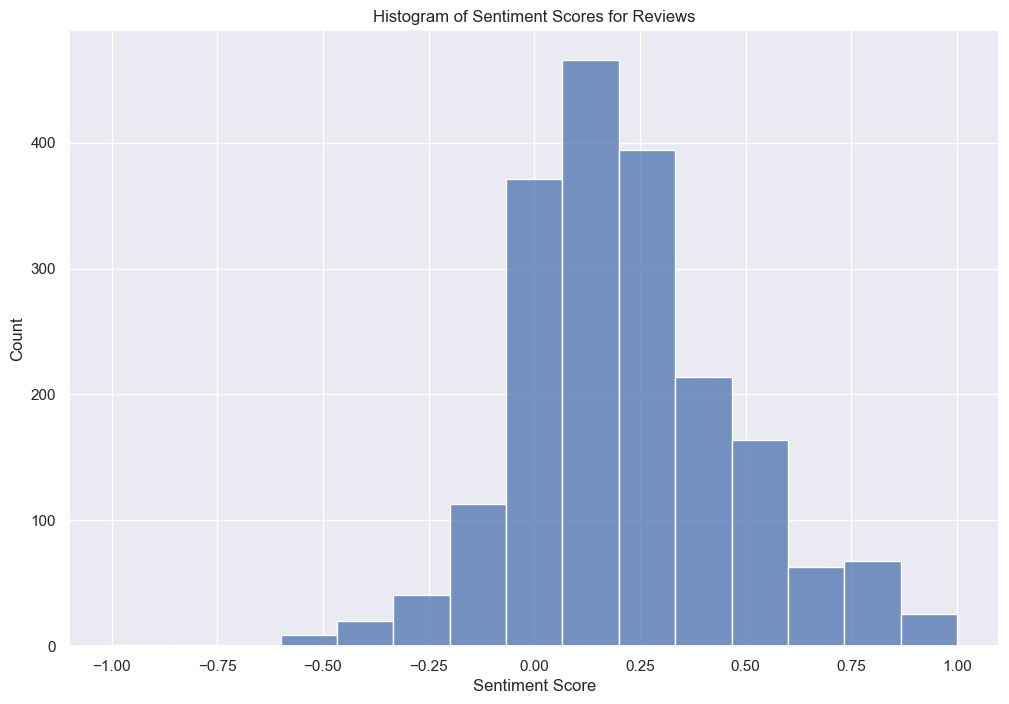

In [172]:
# reviews 
sns.histplot(polarity_df_rev['Sentiment Score'],bins=15)
plt.title("Histogram of Sentiment Scores for Reviews")
plt.show()

Text(0.5, 1.0, 'Histogram of Sentiment Scores for Summaries')

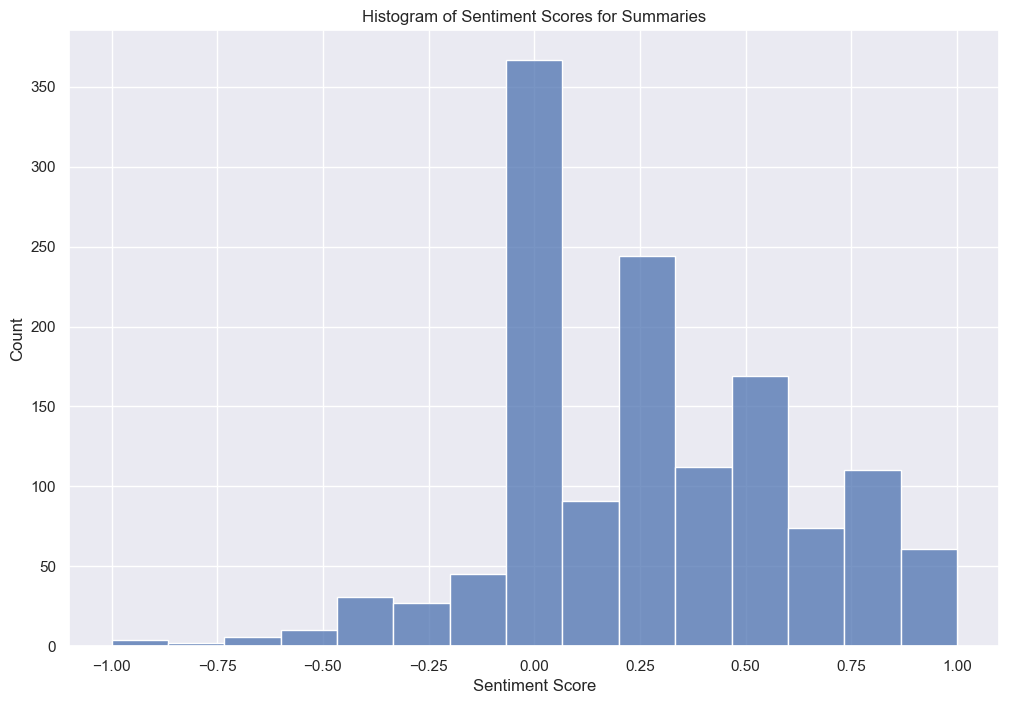

In [173]:
# summaries 
sns.histplot(polarity_df_sum['Sentiment Score'],bins=15)
plt.title("Histogram of Sentiment Scores for Summaries")

## 6. Identify top 20 positive and negative reviews and summaries, respectively

In [175]:
# Top 20 negative reviews.
polarity_df_rev.sort_values(by='Sentiment Score',ascending=True).head(20)

Review  Sentiment Score  \
208   booo unles you are patient know how to measure...        -1.000000   
182                   incomplete kit very disappointing        -0.780000   
1804  im sorry i just find this product to be boring...        -0.583333   
364   one of my staff will be using this game soon s...        -0.550000   
230                    i found the directions difficult        -0.500000   
301                                           difficult        -0.500000   
117   i bought this as a christmas gift for my grand...        -0.500000   
1524                         expensive for what you get        -0.500000   
290              instructions are complicated to follow        -0.500000   
227   this was a gift for my daughter i found it dif...        -0.500000   
174   i sent this product to my granddaughter the po...        -0.491667   
347   my 8 yearold granddaughter and i were very fru...        -0.446250   
538   i purchased this on the recommendation of two ...        -0.440741   
306                 very hard complicated to make these        -0.439583   
1446  you can play the expansions one at a time or a...        -0.400000   
437   this game although it appears to be like uno a...        -0.400000   
427                     kids i work with like this game        -0.400000   
1827                                           jun game        -0.400000   
1829                            scrabble in a card game        -0.400000   
1359   excelent expansion the game is nothing witout it        -0.400000   

      Positivity %  Neutrality %  Negativity %  product  
208            0.0          92.4           7.6     1459  
182            0.0          46.2          53.8     6504  
1804           0.0          78.3          21.7     2253  
364            7.0          80.9          12.1    11056  
230            0.0          61.5          38.5     2173  
301            0.0           0.0         100.0     3525  
117           20.1          69.2          10.7     2387  
1524           0.0         100.0           0.0     7533  
290            0.0         100.0           0.0     6694  
227           17.7          67.1          15.2      231  
174            7.6          83.1           9.4     5758  
347            6.3          64.9          28.9     7384  
538            0.0          91.6           8.4    10281  
306            0.0          74.7          25.3     3165  
1446           7.9          92.1           0.0     9595  
437           22.8          77.2           0.0      195  
427           29.4          70.6           0.0      231  
1827           0.0         100.0           0.0     3896  
1829           0.0         100.0           0.0     3967  
1359           0.0         100.0           0.0     7143

In [176]:
# Top 20 negative summaries.
polarity_df_sum.sort_values(by='Sentiment Score',ascending=True).head(20)

Summary  Sentiment Score  \
21                        the worst value ive ever seen        -1.000000   
208    boring unless you are a craft person which i am         -1.000000   
829                                              boring        -1.000000   
1166  before this i hated running any rpg campaign d...        -0.900000   
1     another worthless dungeon masters screen from ...        -0.800000   
144                                        disappointed        -0.750000   
363   promotes anger instead of teaching calming met...        -0.700000   
890                        bad qualityall made of paper        -0.700000   
885            too bad this is not what i was expecting        -0.700000   
178     at age 31 i found these very difficult to make         -0.650000   
518                                          mad dragon        -0.625000   
101                                    small and boring        -0.625000   
805                                       disappointing        -0.600000   
1003  then you will find this board game to be dumb ...        -0.591667   
364                                  anger control game        -0.550000   
1119                          a disappointing coop game        -0.500000   
504                               its uno for the angry        -0.500000   
1605  its also really lame that the doll didnt come ...        -0.500000   
75                            really small disappointed        -0.500000   
1631                                      cant go wrong        -0.500000   

      Positivity %  Neutrality %  Negativity %  product  
21            22.9          38.1          39.0     1241  
208            0.0          79.6          20.4     1459  
829            0.0           0.0         100.0     2793  
1166           0.0          74.1          25.9     6431  
1              0.0          67.4          32.6      466  
144            0.0           0.0         100.0     2807  
363           39.8          31.2          28.9    11025  
890            0.0          53.3          46.7     3436  
885            0.0          69.6          30.4     6720  
178            0.0          76.3          23.7     7143  
518            0.0          23.8          76.2     5429  
101            0.0          46.5          53.5     3524  
805            0.0           0.0         100.0     1501  
1003           0.0          64.1          35.9      486  
364            0.0          35.1          64.9    11056  
1119           0.0          48.4          51.6     2495  
504            0.0          54.8          45.2     3629  
1605           0.0          79.5          20.5     2829  
75             0.0          37.2          62.8     9612  
1631          56.1          43.9           0.0     9507

In [177]:
# Top 20 positive reviews.
polarity_df_rev.sort_values(by='Sentiment Score',ascending=False).head(20)

Review  Sentiment Score  \
1177               awesome addition to my rpg gm system              1.0   
1715                                        awesome toy              1.0   
1609  this was perfect to go with the 7 bean bags  i...              1.0   
496   excellent activity for teaching selfmanagement...              1.0   
1720  it is the best thing to play with and also min...              1.0   
621   wonderful for my grandson to learn the resurre...              1.0   
1168               best set buy 2 if you have the means              1.0   
194                                        awesome gift              1.0   
1726                  excellent toy to simulate thought              1.0   
609                                  delightful product              1.0   
933                                             awesome              1.0   
1401  one of the best board games i played in along ...              1.0   
1967       perfect for tutoring my grandson in spelling              1.0   
1301                                        its awesome              1.0   
1135                                        awesome set              1.0   
524                         perfect just what i ordered              1.0   
1550  my daughter loves her stickers awesome seller ...              1.0   
591                                   wonderful product              1.0   
7                             came in perfect condition              1.0   
165                                        awesome book              1.0   

      Positivity %  Neutrality %  Negativity %  product  
1177          40.6          59.4           0.0     8923  
1715          80.4          19.6           0.0     7600  
1609          28.6          71.4           0.0     3667  
496           42.5          57.5           0.0     3427  
1720          33.7          66.3           0.0     4712  
621           31.6          68.4           0.0      618  
1168          34.4          65.6           0.0     6471  
194          100.0           0.0           0.0     9080  
1726          48.1          51.9           0.0    11004  
609           79.2          20.8           0.0     1501  
933          100.0           0.0           0.0     4477  
1401          42.3          57.7           0.0      760  
1967          38.1          61.9           0.0     9119  
1301          80.4          19.6           0.0     5430  
1135          80.4          19.6           0.0     7384  
524           48.1          51.9           0.0     8235  
1550          63.2          36.8           0.0     7101  
591           78.7          21.3           0.0     8962  
7             55.2          44.8           0.0     1012  
165           80.4          19.6           0.0    11056

In [178]:
# Top 20 positive summaries.
polarity_df_sum.sort_values(by='Sentiment Score',ascending=False).head(20)

Summary  Sentiment Score  \
662                                not the best quality              1.0   
548                              excellent therapy tool              1.0   
1642                            excellent teaching tool              1.0   
756   perfect tool for learning how to tell time one...              1.0   
1417                                      wonderful and              1.0   
760                     excellent onthego teaching tool              1.0   
80    theyre the perfect size to keep in the car or ...              1.0   
1094  excellent product and everything i wanted it t...              1.0   
997                              best one in the series              1.0   
1635                             wonderful way to learn              1.0   
1388                                  awesome expansion              1.0   
161                                        awesome book              1.0   
1656                       a wonderful reading resource              1.0   
1031     excellent introduction to dungeons and dragons              1.0   
815                          one of the best games ever              1.0   
1543   loves stickers and she loves peppa so this wa...              1.0   
1550                           awesome seller thank you              1.0   
1508                                     wonderful gift              1.0   
1427                                excellent expansion              1.0   
1078                                       perfect gift              1.0   

      Positivity %  Neutrality %  Negativity %  product  
662            0.0          47.1          52.9     6233  
548           64.9          35.1           0.0     7532  
1642          64.9          35.1           0.0     1592  
756           22.2          77.8           0.0     6310  
1417          78.7          21.3           0.0      629  
760           55.2          44.8           0.0    11025  
80            25.2          74.8           0.0     1618  
1094          31.6          68.4           0.0     3165  
997           51.2          48.8           0.0     1463  
1635          55.2          44.8           0.0     9595  
1388          80.4          19.6           0.0     1506  
161           80.4          19.6           0.0    10995  
1656          55.2          44.8           0.0     6720  
1031          42.5          57.5           0.0     3645  
815           45.7          54.3           0.0      535  
1543          61.9          38.1           0.0     3158  
1550          76.7          23.3           0.0     7101  
1508         100.0           0.0           0.0    10196  
1427          78.7          21.3           0.0     3885  
1078         100.0           0.0           0.0     6694

In [179]:
# Identify the products that get the best review
polarity_df_rev

# Identify the products that get the worst reviews

Review  Sentiment Score  \
0     when it comes to a dms screen the space on the...        -0.036111   
1     an open letter to galeforce9* your unpainted m...         0.035952   
2     nice art nice printing why two panels are fill...         0.116640   
3     amazing buy bought it as a gift for our new dm...         0.578788   
4     as my review of gf9s previous screens these we...        -0.316667   
...                                                 ...              ...   
1994  we are retired and find this a great way to st...         0.400000   
1995  the perfect word game for mixed ages with mom ...         0.168750   
1996  great game did not think i would like it when ...         0.158333   
1997           great game for all keeps the mind nimble         0.200000   
1999  this game is fun a lot like scrabble without a...        -0.095833   

      Positivity %  Neutrality %  Negativity %  product  
0              5.6          84.1          10.3      453  
1             19.8          70.5           9.7      466  
2             13.4          72.4          14.3      254  
3             48.6          51.4           0.0      263  
4              0.0          80.4          19.6      291  
...            ...           ...           ...      ...  
1994          26.4          73.6           0.0      291  
1995          36.6          63.4           0.0      977  
1996          23.3          76.7           0.0      979  
1997          36.9          63.1           0.0     1012  
1999          28.7          59.3          12.0      453  

[1951 rows x 6 columns]

### Products with the best reviews

In [181]:
best_products = polarity_df_rev.groupby('product')['Sentiment Score'].mean().reset_index().sort_values(by='Sentiment Score',ascending=False) 

In [182]:
best_20 = best_products.head(20)
best_20

product  Sentiment Score
175     9119         0.453762
174     9080         0.437418
87      3158         0.409383
195    11004         0.405735
124     4619         0.403548
172     8962         0.387891
38      1183         0.375402
114     4065         0.365034
149     6646         0.359455
103     3667         0.353652
146     6471         0.353631
142     6310         0.352393
199    11086         0.349659
101     3645         0.348004
23       629         0.345374
16       515         0.340941
58      2139         0.329581
102     3657         0.317566
167     7600         0.317053
86      3153         0.315495

Out of a total of 200 products, best_products is a list of the 20 most positively reviewed products based on their reviews. Turtle Games might benefit from increasing its advertising of these products. Alternatively, this could be a good opportunity to increase the prices of these products because of their association with higher quality. 

### Products with the worst reviews

In [185]:
worst_20 = best_products.tail(20)

In [186]:
worst_20

product  Sentiment Score
147     6504         0.104181
69      2387         0.102750
61      2253         0.098785
63      2285         0.097840
153     6720         0.093933
160     7143         0.092263
180     9560         0.087730
45      1497         0.087452
112     3967         0.086009
134     5512         0.079721
3        231         0.076851
28       876         0.073922
96      3524         0.071869
14       486         0.048105
116     4399         0.046907
76      2795         0.039169
183     9597         0.029234
144     6431         0.009174
93      3436         0.003820
42      1459        -0.015483

The worst_products is a list of the 20 most negatively (or least positively) reviewed products based on reviews. Management might consider reducing or ceasing the production of these products as they hurt the brand image of Turtle Games. Alternatively, it could venture to improve these products by taking the criticisms on board.